In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad


/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/

In [2]:
#import numpy as np
#import scipy

#print("NumPy version:", np.__version__)
#print("SciPy version:", scipy.__version__)


In [3]:
# 读取空间转录组数据（包含表达矩阵、metadata 等）
#adata_ctrl = sc.read_h5ad("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/control/spatial_cells0.h5ad")
#adata_model = sc.read_h5ad("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/model/spatial_cells1.h5ad")
#adata_drug = sc.read_h5ad("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/drug/spatial_cells1.h5ad")

In [4]:
counts = pd.read_csv("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/control/spatial__adata.csv")
# 设置细胞名为 index，第一列是细胞名
counts.index = counts.iloc[:, 0]
counts = counts.iloc[:, 1:]  # 去掉原本第一列

# 转置，使得行为细胞，列为基因
counts_T = counts.T

# 构建 AnnData
adata_ctrl = ad.AnnData(X=counts_T)
# 添加名称
adata_ctrl.obs_names = counts_T.index  # 细胞名
adata_ctrl.var_names = counts_T.columns  # 基因名

# 检查结果
print(adata_ctrl)


AnnData object with n_obs × n_vars = 6951 × 57755


In [5]:
counts_m = pd.read_csv("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/model/spatial__adata.csv")
# 设置细胞名为 index，第一列是细胞名
counts_m.index = counts_m.iloc[:, 0]
counts_m = counts_m.iloc[:, 1:]  # 去掉原本第一列

# 转置，使得行为细胞，列为基因
counts_m_T = counts_m.T

# 构建 AnnData
adata_model = ad.AnnData(X=counts_m_T)
# 添加名称
adata_model.obs_names = counts_m_T.index  # 细胞名
adata_model.var_names = counts_m_T.columns  # 基因名

# 检查结果
print(adata_model)

AnnData object with n_obs × n_vars = 7326 × 57755


In [6]:
counts_d = pd.read_csv("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/drug/spatial__adata.csv")
# 设置细胞名为 index，第一列是细胞名
counts_d.index = counts_d.iloc[:, 0]
counts_d = counts_d.iloc[:, 1:]  # 去掉原本第一列

# 转置，使得行为细胞，列为基因
counts_d_T = counts_d.T

# 构建 AnnData
adata_drug = ad.AnnData(X=counts_d_T)
# 添加名称
adata_drug.obs_names = counts_d_T.index  # 细胞名
adata_drug.var_names = counts_d_T.columns  # 基因名

# 检查结果
print(adata_drug)

AnnData object with n_obs × n_vars = 6601 × 57755


In [7]:
# 加载坐标（假设有 barcode, x, y 三列）
coord_ctrl = pd.read_csv("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/control/coord1_.csv", index_col=0)
coord_model = pd.read_csv("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/model/coord1_.csv", index_col=0)
coord_drug = pd.read_csv("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/drug/coord1_.csv", index_col=0)

# 确保索引匹配：将 coord 的索引设为 barcode
# 并按 AnnData 对象的索引排序
coord_ctrl = coord_ctrl.loc[adata_ctrl.obs_names]
coord_model = coord_model.loc[adata_model.obs_names]
coord_drug = coord_drug.loc[adata_drug.obs_names]

# 将空间坐标写入 obsm（scanpy 约定用于嵌入/空间坐标等多维信息）
adata_ctrl.obsm['spatial'] = coord_ctrl[['coord_x', 'coord_y']].values
adata_model.obsm['spatial'] = coord_model[['coord_x', 'coord_y']].values
adata_drug.obsm['spatial'] = coord_drug[['coord_x', 'coord_y']].values

In [8]:
import anndata as ad

# 设置样本信息
adata_ctrl.obs["sample"] = "ctrl"
adata_model.obs["sample"] = "model"
adata_drug.obs["sample"] = "drug"

# 解决 obs_names 可能的重复问题
adata_ctrl.obs_names = "ctrl_" + adata_ctrl.obs_names
adata_model.obs_names = "model_" + adata_model.obs_names
adata_drug.obs_names = "drug_" + adata_drug.obs_names

# 合并数据
adata = ad.concat([adata_ctrl, adata_model, adata_drug], axis=0, join="outer")

# 再次确保唯一性
adata.obs_names_make_unique()

# 检查合并后的样本信息
print(adata.obs["sample"].value_counts())


sample
model    7326
ctrl     6951
drug     6601
Name: count, dtype: int64


In [9]:
import scanpy as sc
import numpy as np
# 计算质控指标
adata = adata.copy()  # 确保是实际对象而非 view
adata.var["mt"] = adata.var_names.str.startswith("MT-")  # 线粒体基因
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

In [10]:
print(adata)

AnnData object with n_obs × n_vars = 20878 × 57755
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'


In [11]:
adata = adata[adata.obs['n_genes_by_counts'] < 3000, :]
adata = adata[adata.obs["n_genes_by_counts"] > 100, :]  # 至少100 个基因
adata = adata[adata.obs["total_counts"] > 500, :]
adata = adata[adata.obs["pct_counts_mt"] < 5, :]  # 线粒体基因比例 < 5

In [12]:
print(adata)

View of AnnData object with n_obs × n_vars = 13074 × 57755
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'spatial'


In [13]:
# 归一化（每个细胞标准化到 10,000 计数）
adata = adata.copy()  # 确保是实际对象而非 view
sc.pp.normalize_total(adata, target_sum=1e4)
# 对数变换
sc.pp.log1p(adata)

In [14]:
# 识别前 2000 个高度可变的基因
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
# 只保留高变基因
adata.raw=adata
adata = adata[:, adata.var.highly_variable]

/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [15]:
#降维
adata = adata.copy()  # 确保是实际对象
sc.pp.pca(adata, n_comps=50, svd_solver="arpack")  # 避免计算卡住

In [16]:
import numpy as np
# 将稀疏矩阵转换为稠密矩阵
import scipy.sparse as sp
# 确保 `adata.X` 不是一个 view
adata = adata.copy()
# 检查 `adata.X` 是否是稀疏矩阵，并强制转换为稠密矩阵
if sp.issparse(adata.X):  
    print("Converting sparse matrix to dense...")
    adata.X = adata.X.toarray()  # 使用 `.toarray()` 转换为 NumPy 数组
else:
    print("adata.X is already dense.")

adata.X is already dense.


In [17]:
import harmonypy as hm

adata_corrected = hm.run_harmony(adata.obsm["X_pca"], adata.obs, 'sample', theta=3,max_iter_harmony=20)  # 按样本去批次

2025-10-28 11:19:39,844 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-10-28 11:19:46,561 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-10-28 11:19:46,689 - harmonypy - INFO - Iteration 1 of 20
2025-10-28 11:19:50,102 - harmonypy - INFO - Iteration 2 of 20
2025-10-28 11:19:53,174 - harmonypy - INFO - Iteration 3 of 20
2025-10-28 11:19:54,229 - harmonypy - INFO - Iteration 4 of 20
2025-10-28 11:19:55,267 - harmonypy - INFO - Iteration 5 of 20
2025-10-28 11:19:56,310 - harmonypy - INFO - Iteration 6 of 20
2025-10-28 11:19:57,507 - harmonypy - INFO - Iteration 7 of 20
2025-10-28 11:19:58,807 - harmonypy - INFO - Iteration 8 of 20
2025-10-28 11:20:00,041 - harmonypy - INFO - Iteration 9 of 20
2025-10-28 11:20:01,467 - harmonypy - INFO - Iteration 10 of 20
2025-10-28 11:20:02,763 - harmonypy - INFO - Iteration 11 of 20
2025-10-28 11:20:03,989 - harmonypy - INFO - Converged after 11 iterations


In [18]:
adata.obsm['X_pca_harmony'] = adata_corrected.Z_corr.T  # 转置矩阵

In [19]:
print(adata.obsm['X_pca_harmony'].shape)  # 期待输出 (39830, n_components)

(13074, 50)


In [20]:
print("当前 AnnData 大小:", adata.shape)
print("PCA-Harmony 降维结果大小:", adata.obsm['X_pca_harmony'].shape)
print("obs 行数:", adata.obs.shape[0])
print("X 表达矩阵行数:", adata.X.shape[0])



当前 AnnData 大小: (13074, 2000)
PCA-Harmony 降维结果大小: (13074, 50)
obs 行数: 13074
X 表达矩阵行数: 13074


In [21]:
print(adata.obsm.keys())

KeysView(AxisArrays with keys: spatial, X_pca, X_pca_harmony)


/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


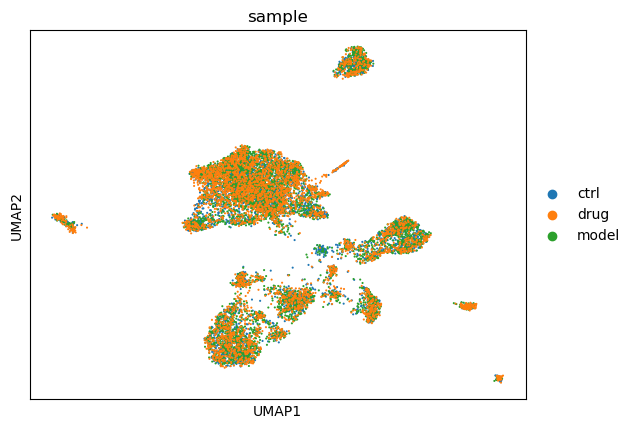

In [22]:
#umap
# 确保 PCA 已执行
sc.pp.pca(adata, n_comps=50, svd_solver='arpack')  # arpack 更稳定
sc.pp.neighbors(adata, n_neighbors=260, n_pcs=30, random_state=42, use_rep="X_pca")
sc.tl.umap(adata, init_pos="random")
sc.pl.umap(adata, color=["sample"])

/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


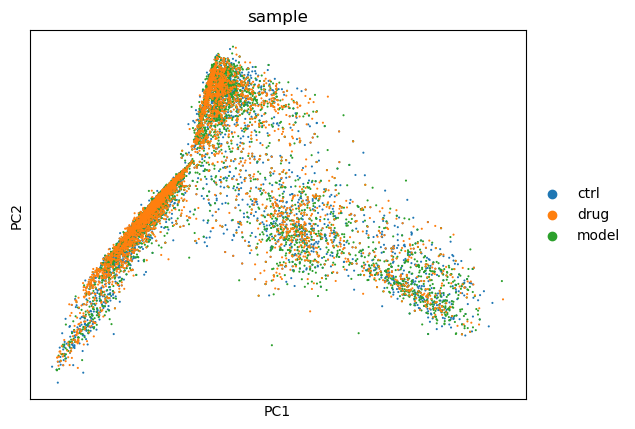

In [23]:
sc.pl.pca(adata, color="sample")

In [24]:
print(adata.shape)  # 确保你没有把稀疏矩阵变成密集形式，基因×细胞数是否异常
sc.tl.leiden(adata, resolution=0.1)
print(adata.obs['leiden'].value_counts())


(13074, 2000)
leiden
0    6651
1    3255
2    1509
3     661
4     464
5     206
6     171
7      79
8      78
Name: count, dtype: int64


/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


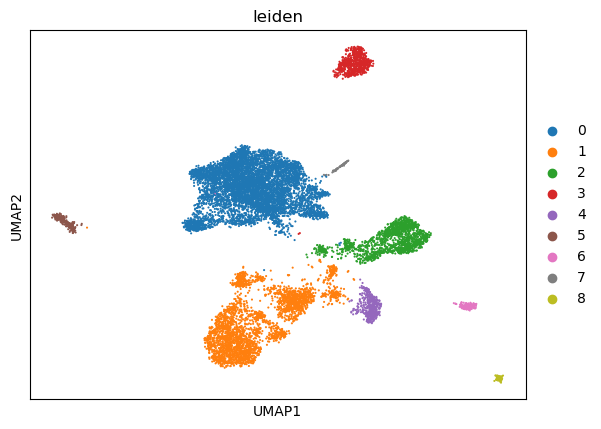

In [25]:
#聚类
#sc.tl.leiden(adata, resolution=0.1,random_state=42)
sc.pl.umap(adata, color=["leiden"])



/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 

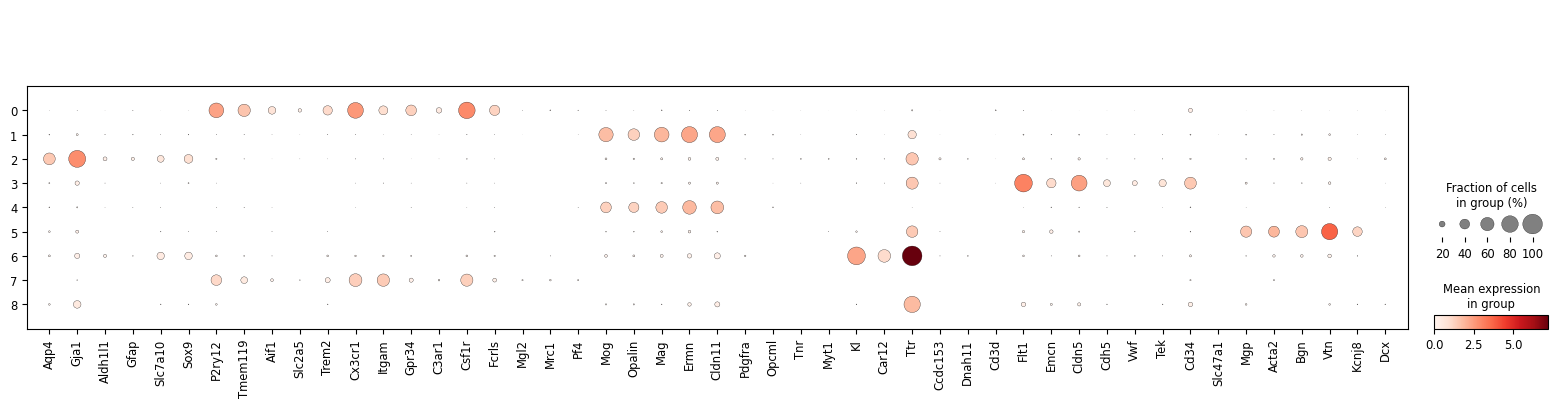

In [26]:
genes_of_interest = ['Aqp4', 'Gja1', 'Aldh1l1', 'Gfap', 'Slc7a10', 'Sox9',#(Astrocytes)
                     'P2ry12', 'Tmem119', 'Aif1', 'Slc2a5', 'Trem2', 'Cx3cr1', 'Itgam', 'Gpr34', 'C3ar1', 'Csf1r', 'Fcrls',#Microglia
                     'Mgl2', 'Mrc1', 'Pf4',#Macrophages
                     'Mog','Opalin', 'Mag', 'Ermn', 'Cldn11' ,#(Oligodendrocytes)
                     'Pdgfra', 'Opcml', 'Tnr', 'Myt1', #(Oligodendrocyte precursors)
                     'Kl', 'Car12', 'Ttr',# (Choroid plexus), 
                     'Ccdc153', 'Dnah11', #(Ependymal), 
                     'Cd3d', #(Lymphocytes), 
                     'Flt1', 'Emcn', 'Cldn5', 'Cdh5', 'Vwf', 'Tek', 'Cd34', #(Endothelial), 
                     'Slc47a1', 'Mgp', #(Vascular leptomeningeal), 
                     'Acta2', 'Bgn', #(Vascular smooth muscle), 
                     'Vtn', 'Kcnj8', #(Pericytes), 
                     'Dcx' #(Neuroprogenitors)
                    ]
#genes_of_interest = ['Cd3e','Cd3g','Cd3d']
adata_sub = adata[adata.obs['leiden'].isin([str(i) for i in range(18)])].copy()
sc.pl.dotplot(adata_sub, var_names=genes_of_interest, groupby='leiden')


In [27]:
#cluster_to_cell_type = {
#   '0': 'Microglia',#√     
#   '1': 'Oligodendrocytes',#√        
#   '2': 'Astrocytes', #√    
#   '3': 'Endothelial', #√
#   '4': 'Oligodendrocytes', #√
#   '5': 'Pericytes',#√
#   '6': 'Choroid plexus',#√
#   '7': 'Microglia',#√
#   '8': 'Choroid plexus',#√
#}
    
    

In [28]:
# 添加cell_type列
#adata.obs["cell_type"] = adata.obs['leiden'].map(cluster_to_cell_type)

# 检查是否成功添加
#print(adata.obs["cell_type"].head())  # 检查 'cell_type' 列是否成功添加


In [29]:

# 保存 h5ad 文件（包含聚类和注释）
#adata.write("annotated_data.h5ad")


In [30]:
import scanpy as sc

# 直接加载之前的聚类和注释
adata = sc.read("annotated_data.h5ad")

# 查看注释是否还在
print(adata.obs['cell_type'].value_counts())


/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


cell_type
Microglia           6732
Oligodendrocytes    3717
Astrocytes          1512
Endothelial          658
Choroid plexus       249
Pericytes            206
Name: count, dtype: int64


/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


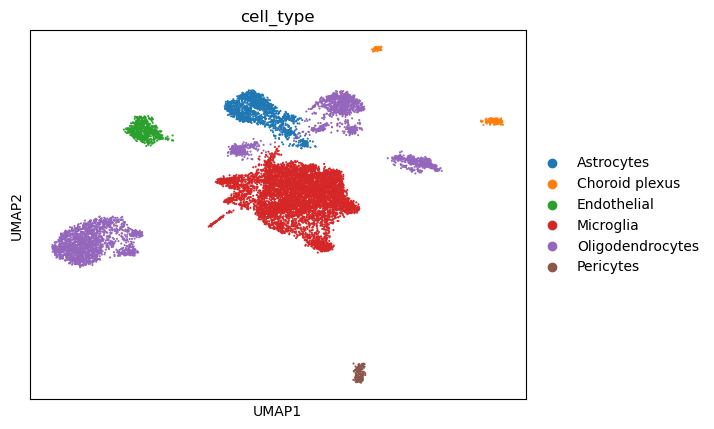

In [31]:
# 使用 'cell_type' 作为颜色来查看手动注释后的 UMAP
# 使用默认设置绘制 UMAP 图
sc.pl.umap(adata, color=["cell_type"],legend_loc="right margin",save="_celltype.pdf")


In [32]:
# 过滤出ctrl组和model组的数据
adata_ctrl = adata[adata.obs['sample'] == 'ctrl', :].copy()
adata_model = adata[adata.obs['sample'] == 'model', :].copy()
adata_drug = adata[adata.obs['sample'] == 'drug', :].copy()
# 获取ctrl组中的细胞类型
cell_types_ctrl = adata_ctrl.obs['cell_type'].unique()
print("Ctrl组中的细胞类型有：")
print(cell_types_ctrl)

# 获取model组中的细胞类型
cell_types_model = adata_model.obs['cell_type'].unique()
print("Model组中的细胞类型有：")
print(cell_types_model)

cell_types_drug = adata_drug.obs['cell_type'].unique()
print("drug组中的细胞类型有：")
print(cell_types_drug)


Ctrl组中的细胞类型有：
['Oligodendrocytes', 'Endothelial', 'Astrocytes', 'Microglia', 'Pericytes', 'Choroid plexus']
Categories (6, object): ['Astrocytes', 'Choroid plexus', 'Endothelial', 'Microglia', 'Oligodendrocytes', 'Pericytes']
Model组中的细胞类型有：
['Microglia', 'Oligodendrocytes', 'Astrocytes', 'Endothelial', 'Choroid plexus', 'Pericytes']
Categories (6, object): ['Astrocytes', 'Choroid plexus', 'Endothelial', 'Microglia', 'Oligodendrocytes', 'Pericytes']
drug组中的细胞类型有：
['Microglia', 'Astrocytes', 'Choroid plexus', 'Oligodendrocytes', 'Endothelial', 'Pericytes']
Categories (6, object): ['Astrocytes', 'Choroid plexus', 'Endothelial', 'Microglia', 'Oligodendrocytes', 'Pericytes']


In [33]:
import numpy as np
import pandas as pd
import scipy.stats as stats
# 只保留 ctrl 和 model 组的数据并确保是副本
adata_filtered = adata[adata.obs['sample'].isin(['ctrl', 'model']), :].copy()

# 初始化一个字典存储每个细胞类型中每个基因的表达数据
cell_types = adata_filtered.obs['cell_type'].unique()  # 假设有 'cell_type' 列
fold_changes = {}
log2_model_expr = {}
# 遍历每个细胞类型
for cell_type in cell_types:
    # 获取该细胞类型在 ctrl 和 model 组的表达数据
    ctrl_cells = adata_filtered[(adata_filtered.obs['sample'] == 'ctrl') & 
                                 (adata_filtered.obs['cell_type'] == cell_type), :].X
    model_cells = adata_filtered[(adata_filtered.obs['sample'] == 'model') & 
                                  (adata_filtered.obs['cell_type'] == cell_type), :].X
    
    # 计算每个细胞类型在 ctrl 和 model 组中的平均表达
    ctrl_mean = np.mean(ctrl_cells, axis=0) + 1  # 加1避免 log(0)
    model_mean = np.mean(model_cells, axis=0) + 1  # 加1避免 log(0)
    # 计算 model 组每个基因的平均表达
    log2_model = np.log2(model_mean)  # 加1以避免 log(0)
    # 计算 fold change（log2）
    log2_fc = np.log2(model_mean / ctrl_mean)
    # 将结果保存到字典
    fold_changes[cell_type] = log2_fc
    log2_model_expr[cell_type] = log2_model

# 创建一个 DataFrame 保存所有细胞类型的 fold change
log2_fc_df = pd.DataFrame(fold_changes, index=adata_filtered.var_names)
log2_fc_df['gene'] = log2_fc_df.index  # 保持基因名
log2_fc_df = log2_fc_df[['gene'] + list(cell_types)]  # 调整列顺序

# 创建 DataFrame 保存 model 组基因表达的 log2 值
log2_model_expr_df = pd.DataFrame(log2_model_expr, index=adata_filtered.var_names) 
log2_model_expr_df['gene'] = log2_model_expr_df.index  # 保持基因名
log2_model_expr_df = log2_model_expr_df[['gene'] + list(cell_types)]  # 调整列顺序

# 创建一个 DataFrame 存储 change 信息
# 移除 'gene' 列，仅保留 log2 fold change 数值(创建log2_fc_values副本只保存数值）
log2_fc_values = log2_fc_df.set_index('gene')  # 确保基因名作为索引
log2_fc_values = log2_fc_values.apply(pd.to_numeric, errors='coerce')  # 转换为浮点数，确保计算无误

log2_fc_change_df = log2_fc_values.copy()
log2_fc_change_df = log2_fc_change_df.applymap(lambda x: 'up' if x > 0.1 else ('down' if x < -0.1 else 'stable'))
# 重新添加基因名列
log2_fc_change_df.insert(0, 'gene', log2_fc_values.index)
# 显示前几行
log2_fc_change_df.head()

/tmp/ipykernel_58708/1870790492.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log2_fc_change_df = log2_fc_change_df.applymap(lambda x: 'up' if x > 0.1 else ('down' if x < -0.1 else 'stable'))


,gene,Oligodendrocytes,Endothelial,Astrocytes,Microglia,Pericytes,Choroid plexus
gene,,,,,,,
1110003F10Rik,1110003F10Rik,stable,stable,stable,stable,stable,stable
1600002K03Rik,1600002K03Rik,stable,stable,stable,stable,stable,up
1700011I03Rik,1700011I03Rik,stable,stable,stable,stable,stable,stable
1700027A07Rik,1700027A07Rik,stable,stable,stable,stable,stable,stable
1700028J19Rik,1700028J19Rik,stable,stable,stable,stable,stable,stable


In [34]:
# 查看最终结果
log2_fc_df.head(), log2_model_expr_df.head()

(                        gene  Oligodendrocytes  Endothelial  Astrocytes  \
 Unnamed: 0                                                                
 1110003F10Rik  1110003F10Rik          0.000000     0.000000    0.000000   
 1600002K03Rik  1600002K03Rik          0.007246    -0.000331   -0.000475   
 1700011I03Rik  1700011I03Rik          0.000000     0.000000    0.003272   
 1700027A07Rik  1700027A07Rik          0.000000     0.000000    0.000000   
 1700028J19Rik  1700028J19Rik          0.000000     0.000000    0.006906   
 
                Microglia  Pericytes  Choroid plexus  
 Unnamed: 0                                           
 1110003F10Rik   0.000000        0.0        0.000000  
 1600002K03Rik   0.010302        0.0        0.102226  
 1700011I03Rik   0.004577        0.0        0.000000  
 1700027A07Rik  -0.002369        0.0        0.000000  
 1700028J19Rik  -0.004098        0.0        0.000000  ,
                         gene  Oligodendrocytes  Endothelial  Astrocytes  \
 Unn

In [35]:
print(log2_fc_df.columns)
print(log2_model_expr_df.columns)


Index(['gene', 'Oligodendrocytes', 'Endothelial', 'Astrocytes', 'Microglia',
       'Pericytes', 'Choroid plexus'],
      dtype='object')
Index(['gene', 'Oligodendrocytes', 'Endothelial', 'Astrocytes', 'Microglia',
       'Pericytes', 'Choroid plexus'],
      dtype='object')


In [36]:
# 将 log2_fc_df 和 log2_model_expr_df 中的所有数据转换为数值类型
log2_fc_df = log2_fc_df.apply(pd.to_numeric, errors='coerce')
log2_model_expr_df = log2_model_expr_df.apply(pd.to_numeric, errors='coerce')

# 初始化一个字典来存储每个细胞类型符合条件的基因名称
filtered_genes_by_cell_type = {}

# 获取细胞类型列表
cell_types = log2_fc_df.columns

# 遍历每个细胞类型
for cell_type in cell_types:
    # 筛选出 log2_model > 0.6 的基因
    filtered_model_genes = log2_model_expr_df[cell_type][log2_model_expr_df[cell_type] > 0.1].dropna().index
    
    # 筛选出 log2_fc > 0.1 的基因
    filtered_fc_genes = log2_fc_df[cell_type][log2_fc_df[cell_type].abs() > 0.03].dropna().index
    
    # 获取两个条件都符合的基因名称（交集部分）
    common_genes = filtered_model_genes.intersection(filtered_fc_genes)
    
    # 保存符合条件的基因名称
    filtered_genes_by_cell_type[cell_type] = common_genes

# 统计每个细胞类型符合条件的基因数量
gene_counts_by_cell_type = {cell_type: len(genes) for cell_type, genes in filtered_genes_by_cell_type.items()}

# 打印每个细胞类型及其对应的基因数量
for cell_type, count in gene_counts_by_cell_type.items():
    print(f"{cell_type}: {count} genes")


gene: 0 genes
Oligodendrocytes: 37 genes
Endothelial: 183 genes
Astrocytes: 106 genes
Microglia: 86 genes
Pericytes: 265 genes
Choroid plexus: 197 genes


In [37]:
# 将字典转换为长表 DataFrame
records = []
for cell_type, gene_list in filtered_genes_by_cell_type.items():
    # 排除非细胞类型（例如 'gene'）
    if cell_type not in log2_fc_df.columns:
        continue
    for gene in gene_list:
        records.append({'cell_type': cell_type, 'gene': gene})

filtered_genes_df = pd.DataFrame(records)

# 显示前几行
print(filtered_genes_df.head())
print(filtered_genes_df.shape)

          cell_type     gene
0  Oligodendrocytes  Abhd17a
1  Oligodendrocytes   Ankhd1
2  Oligodendrocytes    Cald1
3  Oligodendrocytes   Cdk11b
4  Oligodendrocytes   Cep120
(874, 2)


In [38]:
# ✅ 如果 gene 已经是 index，就不需要再设置 index
log2_fc_df_indexed = log2_fc_df.copy()

# 计算 log2_fc（使用行列定位）
def get_log2_fc(row):
    try:
        return log2_fc_df_indexed.loc[row['gene'], row['cell_type']]
    except KeyError:
        return None

# 填充 log2_fc
filtered_genes_df['log2_fc'] = filtered_genes_df.apply(get_log2_fc, axis=1)

# 检查结果
print(filtered_genes_df)


            cell_type     gene   log2_fc
0    Oligodendrocytes  Abhd17a  0.048115
1    Oligodendrocytes   Ankhd1  0.031106
2    Oligodendrocytes    Cald1  0.030470
3    Oligodendrocytes   Cdk11b  0.053345
4    Oligodendrocytes   Cep120  0.030766
..                ...      ...       ...
869    Choroid plexus   Zbtb7a  0.090287
870    Choroid plexus  Zcchc11  0.159191
871    Choroid plexus   Zcchc6 -0.068572
872    Choroid plexus    Zfp62  0.041359
873    Choroid plexus    Zrsr2  0.060851

[874 rows x 3 columns]


In [39]:
 #统计每个基因在多少个细胞类型中出现
gene_counts = filtered_genes_df['gene'].value_counts()

# 选择在多个细胞类型中出现的基因（如至少2个）
common_genes = gene_counts[gene_counts >= 1].index.tolist()

# 筛选出这些基因对应的行
common_genes_df = filtered_genes_df[filtered_genes_df['gene'].isin(common_genes)]

# 检查一下
print(common_genes_df['gene'].nunique())
print(common_genes_df.head())

517
          cell_type     gene   log2_fc
0  Oligodendrocytes  Abhd17a  0.048115
1  Oligodendrocytes   Ankhd1  0.031106
2  Oligodendrocytes    Cald1  0.030470
3  Oligodendrocytes   Cdk11b  0.053345
4  Oligodendrocytes   Cep120  0.030766


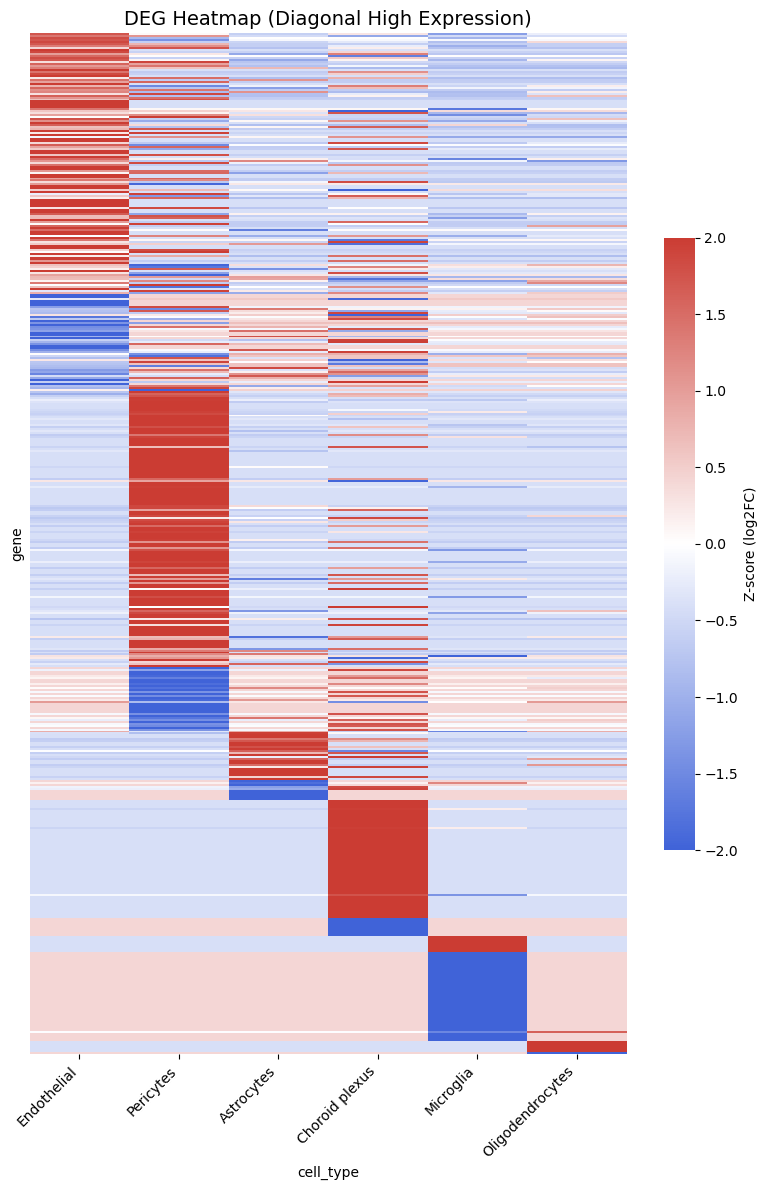

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. 构建 gene × cell_type 的 log2_fc 矩阵
heatmap_data = common_genes_df.pivot(index='gene', columns='cell_type', values='log2_fc')
heatmap_data = heatmap_data.fillna(0)

# 2. 设置固定列顺序
desired_order = [
    'Endothelial', 'Pericytes','Astrocytes', 'Choroid plexus',
        'Microglia','Oligodendrocytes'  
]
# 只保留存在的列
valid_order = [c for c in desired_order if c in heatmap_data.columns]
heatmap_data = heatmap_data[valid_order]

# 3. 为每个基因找到其所属细胞类型（来源）
gene_source = common_genes_df.drop_duplicates(subset=["gene"])[["gene", "cell_type"]].set_index("gene")

# 4. 给每个细胞类型分配排序位置
cell_order_dict = {cell: i for i, cell in enumerate(valid_order)}

# 5. 给每个基因打分：它的来源细胞类型在 valid_order 中的位置
gene_scores = gene_source["cell_type"].map(cell_order_dict)

# 6. 按 gene_scores 对行排序（模拟对角线效果）
# 最终按细胞类型组合后拼接
sorted_gene_list = []

for cell in valid_order:
    # 当前细胞类型下的 log2FC 表达
    fc_values = heatmap_data[cell]

    # 上调（红色）：从大到小排序
    up_genes = fc_values[fc_values > 0].sort_values(ascending=False).index.tolist()
    # 下调（蓝色）：从小到大排序
    down_genes = fc_values[fc_values < 0].sort_values().index.tolist()

    # 按顺序添加：红色在前，蓝色在后
    sorted_gene_list.extend(up_genes + down_genes)

# 去重，保持排序（因为有些基因可能在多个细胞类型中都调控）
from collections import OrderedDict
sorted_gene_list = list(OrderedDict.fromkeys(sorted_gene_list))

# 重新排序热图矩阵
heatmap_data_sorted = heatmap_data.loc[sorted_gene_list, valid_order]


#heatmap_data["__gene_order"] = gene_scores
#heatmap_data_sorted = heatmap_data.sort_values(by="__gene_order").drop(columns="__gene_order")
# 7. Z-score 标准化（按行，即每个基因）
heatmap_data_scaled = heatmap_data_sorted.sub(
    heatmap_data_sorted.mean(axis=1), axis=0
).div(
    heatmap_data_sorted.std(axis=1), axis=0
).fillna(0)
# 8. 自定义颜色映射（0=白色，负值=蓝，正值=红）
my_cmap = LinearSegmentedColormap.from_list(
    "refined",
    ["#4063D8", "white", "#CB3C33"]
)

# 9. 绘图
plt.figure(figsize=(8, 12))
sns.heatmap(
    heatmap_data_scaled,
    cmap=my_cmap,
    vmin=-2, vmax=2, center=0,
    xticklabels=True, yticklabels=False,
    cbar_kws={'label': 'Z-score (log2FC)', 'shrink': 0.6}
)

plt.title("DEG Heatmap (Diagonal High Expression)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("figures/heatmap_logFC_scaled.pdf", dpi=300)
plt.show()


In [41]:
import os

# 创建一个文件夹存放结果
output_dir = "PPI_gene_lists"
os.makedirs(output_dir, exist_ok=True)

# 遍历每个细胞类型并保存文件
for cell_type, genes in filtered_genes_by_cell_type.items():
    file_path = os.path.join(output_dir, f"{cell_type}_PPI_genes.txt")
    with open(file_path, "w") as f:
        for gene in genes:
            f.write(gene + "\n")

print(f"所有细胞类型的基因列表已保存在 {output_dir} 文件夹中")


所有细胞类型的基因列表已保存在 PPI_gene_lists 文件夹中


In [42]:
import requests
import time

# STRING API 的基地址
STRING_API_URL = "https://string-db.org/api/json/network"

# 你的 sessionId（从 URL 里复制）
session_id = "blvaWwIrKaF9"

# 遍历每个细胞类型并提交基因列表
ppi_results = {}

for cell_type, genes in filtered_genes_by_cell_type.items():
    print(f"正在处理 {cell_type}...")

    # 组合基因为逗号分隔的字符串
    gene_list_str = "%0d".join(genes)

    # 构造 API 请求参数
    params = {
        "identifiers": gene_list_str,  # 基因列表
        "species": 10090,  # 物种 ID（10090 是小鼠，9606 是人）
        "required_score": 400,  # 设定交互分数阈值
        "sessionId": session_id,  # 你的 STRING session ID
    }

    # 发送 GET 请求
    response = requests.get(STRING_API_URL, params=params)

    if response.status_code == 200:
        ppi_results[cell_type] = response.json()
        print(f"{cell_type} PPI 结果获取成功")
    else:
        print(f"{cell_type} 失败, HTTP 状态码: {response.status_code}")

    # 避免 API 速率限制，暂停 1 秒
    time.sleep(1)

print("所有细胞类型的 PPI 结果已获取完毕！")

正在处理 gene...
gene 失败, HTTP 状态码: 400
正在处理 Oligodendrocytes...
Oligodendrocytes PPI 结果获取成功
正在处理 Endothelial...
Endothelial PPI 结果获取成功
正在处理 Astrocytes...
Astrocytes PPI 结果获取成功
正在处理 Microglia...
Microglia PPI 结果获取成功
正在处理 Pericytes...
Pericytes PPI 结果获取成功
正在处理 Choroid plexus...
Choroid plexus PPI 结果获取成功
所有细胞类型的 PPI 结果已获取完毕！


In [43]:
import os
import json

# 指定保存的文件夹名称
output_folder = "PPI_result"

# 在当前目录下创建文件夹（如果不存在）
os.makedirs(output_folder, exist_ok=True)

# 保存 JSON 文件到 PPI_results 文件夹
for cell_type, result in ppi_results.items():
    file_path = os.path.join(output_folder, f"{cell_type}_PPI.json")
    with open(file_path, "w") as f:
        json.dump(result, f, indent=4)

print(f"所有 PPI 结果已保存到 {output_folder} 文件夹！")

所有 PPI 结果已保存到 PPI_result 文件夹！


In [44]:
import os
import json
import networkx as nx
import pandas as pd

# 指定 PPI 结果文件夹
ppi_folder = "PPI_result"

# 初始化一个字典存储每个细胞类型的度中心度
degree_centrality_by_cell_type = {}

# 遍历 PPI_results 文件夹中的所有 JSON 文件
for file_name in os.listdir(ppi_folder):
    if file_name.endswith("_PPI.json"):  # 只处理 JSON 文件
        cell_type = file_name.replace("_PPI.json", "")  # 提取细胞类型
        file_path = os.path.join(ppi_folder, file_name)

        # 读取 JSON 数据
        with open(file_path, "r") as f:
            ppi_data = json.load(f)

        # 构建 PPI 网络
        G = nx.Graph()
        for interaction in ppi_data:
            protein1 = interaction["preferredName_A"]  # STRING 交互中的基因A
            protein2 = interaction["preferredName_B"]  # STRING 交互中的基因B
            G.add_edge(protein1, protein2)  # 添加边

        # 计算度中心度
        degree_centrality =  dict(G.degree())
        # 存储到字典
        degree_centrality_by_cell_type[cell_type] = degree_centrality

# 转换为 DataFrame，方便查看
df_list = []
for cell_type, centrality_dict in degree_centrality_by_cell_type.items():
    df = pd.DataFrame(centrality_dict.items(), columns=["Gene", "Degree Centrality"])
    df["Cell Type"] = cell_type  # 添加细胞类型列
    df_list.append(df)

# 合并所有细胞类型的数据
degree_centrality_df = pd.concat(df_list, ignore_index=True)

# 查看前5行数据
degree_centrality_df.head()

,Gene,Degree Centrality,Cell Type
0,Ccnd2,3,Pericytes
1,Fos,13,Pericytes
2,Notch3,7,Pericytes
3,Cdkn1c,3,Pericytes
4,Ccl3,7,Pericytes


In [45]:
cell_types = degree_centrality_df["Cell Type"].unique()
print(cell_types)


['Pericytes' 'Astrocytes' 'Oligodendrocytes' 'Endothelial'
 'Choroid plexus' 'Microglia']


In [46]:
import numpy as np
import pandas as pd

# 假设 degree_centrality_df 已经加载，包含 'Gene' 和 'Cell Type' 列
# 假设 adata.obs['sample'] 包含 'ctrl', 'model', 'smi' 组的信息
# 假设 adata.var_names 是基因名，adata.X 是表达矩阵

# 创建存储 RL 结果的字典
rl_results = {}

# 遍历每个细胞类型
for cell_type in degree_centrality_df["Cell Type"].unique():
    # 获取该细胞类型的 PPI 基因
    ppi_genes = degree_centrality_df[degree_centrality_df["Cell Type"] == cell_type]["Gene"]
    
    # 确保这些基因在 adata.var_names 中
    valid_genes = [gene for gene in ppi_genes if gene in adata.var_names]
    
    # 获取对应基因在 ctrl, model, smi 组的表达值
    ctrl_expr = np.mean(adata[adata.obs["sample"] == "ctrl"][:, valid_genes].X, axis=0) + 1  # 避免 log(0)
    model_expr = np.mean(adata[adata.obs["sample"] == "model"][:, valid_genes].X, axis=0) + 1
    drug_expr = np.mean(adata[adata.obs["sample"] == "drug"][:, valid_genes].X, axis=0) + 1
    
    # 计算 log2 表达值
    log_ctrl = np.log2(ctrl_expr)
    log_model = np.log2(model_expr)
    log_drug = np.log2(drug_expr)
    
    # 计算 RL
    rl_values = (log_drug - log_model) / (log_ctrl - log_model)
    
    # 存储结果
    rl_results[cell_type] = pd.DataFrame({
        "Gene": valid_genes,
        "RL": rl_values
    })

# 合并所有细胞类型的 RL 结果
rl_df = pd.concat(rl_results, keys=rl_results.keys()).reset_index()
rl_df.rename(columns={"level_0": "Cell Type"}, inplace=True)  # 让细胞类型变成普通列

# 查看前几行
rl_df.head()

,Cell Type,level_1,Gene,RL
0,Pericytes,0,Ccnd2,-0.515880
1,Pericytes,1,Fos,0.515019
2,Pericytes,2,Notch3,1.697672
3,Pericytes,3,Cdkn1c,-42.564220
4,Pericytes,4,Ccl3,0.611551


In [47]:
# 先创建一个空的 DataFrame 来存储最终的 EoR 结果
EoR_df = pd.DataFrame(columns=["Cell Type", "Gene", "RL", "EoR", "Change"])

# 遍历每个细胞类型
for cell_type in log2_fc_change_df.columns[1:]:  # 跳过 'gene' 列
    # 获取该细胞类型在 log2_fc_change_df 中的 up/down 基因
    up_genes = log2_fc_change_df[log2_fc_change_df[cell_type] == "up"]["gene"]
    down_genes = log2_fc_change_df[log2_fc_change_df[cell_type] == "down"]["gene"]
    # 合并 up 和 down 基因
    selected_genes = pd.concat([up_genes, down_genes])
    
    # 在 rl_df 中筛选这些基因
    selected_rl = rl_df[(rl_df["Cell Type"] == cell_type) & (rl_df["Gene"].isin(selected_genes))].copy()
     # 确保 selected_rl 的基因都在 adata 中
    valid_genes = [gene for gene in selected_rl["Gene"] if gene in adata.var_names]
    if not valid_genes:
        continue  # 跳过没有有效基因的情况
        
    # 获取表达值
    ctrl_expr = np.mean(adata[adata.obs["sample"] == "ctrl"][:, valid_genes].X, axis=0) + 1
    model_expr = np.mean(adata[adata.obs["sample"] == "model"][:, valid_genes].X, axis=0) + 1
    
    # 计算 log2 表达值差异（方向性保留）
    log_ctrl = np.log2(ctrl_expr)
    log_model = np.log2(model_expr)
    # 计算 EoR_all
    EoR_1 = np.abs(log_model - log_ctrl)
    EoR= (EoR_1 > 0.5).astype(int)  # 逻辑判断，符合条件设为 1，否则设为 0
    # 添加 EoR 到表格中
    # 重新对 selected_rl 进行基因排序匹配 valid_genes 的顺序
    selected_rl = selected_rl[selected_rl["Gene"].isin(valid_genes)]
    selected_rl = selected_rl.set_index("Gene").loc[valid_genes].reset_index()


    selected_rl["EoR"] = EoR

    # 过滤 EoR < 0 或 EoR > 2 的基因
    selected_rl = selected_rl[(selected_rl["EoR"] >= 0) & (selected_rl["EoR"] <= 2)]
    # 添加 up/down 标注
    selected_rl["Change"] = selected_rl["Gene"].map(
        lambda g: "up" if g in up_genes.values else "down"
    )
    
    # 追加到 EoR_df
    EoR_df = pd.concat([EoR_df, selected_rl])

# 重置索引
EoR_df.reset_index(drop=True, inplace=True)

# 查看前几行
EoR_df.head()


/tmp/ipykernel_58708/1852207578.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  EoR_df = pd.concat([EoR_df, selected_rl])


,Cell Type,Gene,RL,EoR,Change,level_1
0,Endothelial,Klf2,-1.403455,0,up,1.0
1,Endothelial,Dusp1,-0.266089,0,up,7.0
2,Endothelial,Fos,0.515019,0,up,10.0
3,Endothelial,Jun,-0.024648,0,up,11.0
4,Endothelial,Gtf2f2,0.188458,0,up,16.0


In [48]:
unique_changes = EoR_df['Change'].value_counts()
print(unique_changes)


Change
up      160
down     55
Name: count, dtype: int64


In [49]:
import pandas as pd

# 合并两个 DataFrame，依据 Cell Type 和 Gene 两个键
RR_updown = EoR_df.merge(
    degree_centrality_df[["Gene", "Cell Type","Degree Centrality"]],
    on=["Gene", "Cell Type"],
    how="left"
)

print(RR_updown.columns.tolist())


['Cell Type', 'Gene', 'RL', 'EoR', 'Change', 'level_1', 'Degree Centrality']


In [50]:
# Step 3: 计算 RR = EoR × Degree Centrality
RR_updown["RR_updown"] = RR_updown["EoR"] * RR_updown["Degree Centrality"]

# Step 4: 查看结果
print(RR_updown.head())

     Cell Type    Gene        RL EoR Change  level_1  Degree Centrality  \
0  Endothelial    Klf2 -1.403455   0     up      1.0                  6   
1  Endothelial   Dusp1 -0.266089   0     up      7.0                  8   
2  Endothelial     Fos  0.515019   0     up     10.0                 15   
3  Endothelial     Jun -0.024648   0     up     11.0                 19   
4  Endothelial  Gtf2f2  0.188458   0     up     16.0                  4   

  RR_updown  
0         0  
1         0  
2         0  
3         0  
4         0  


In [51]:
EoR_all_list = []

for cell_type in rl_df["Cell Type"].unique():
    # 筛选出该细胞类型的数据
    sub_df = rl_df[rl_df["Cell Type"] == cell_type].copy()
    
    # 计算 EoR_all
    sub_df["EoR_all"] = 1 - abs(1 - sub_df["RL"])
    
    # 过滤 EoR_all > 0 且 < 2
    sub_df = sub_df[(sub_df["EoR_all"] > 0) & (sub_df["EoR_all"] < 2)]
    # 添加细胞类型列
    sub_df["Cell Type"] = cell_type
    # 将结果添加到列表中
    EoR_all_list.append(sub_df[["Cell Type", "Gene", "RL", "EoR_all"]])

# 将列表中的数据合并为一个 DataFrame
EoR_all_df = pd.concat(EoR_all_list, ignore_index=True)

EoR_all_df.head()

,Cell Type,Gene,RL,EoR_all
0,Pericytes,Fos,0.515019,0.515019
1,Pericytes,Notch3,1.697672,0.302328
2,Pericytes,Ccl3,0.611551,0.611551
3,Pericytes,Ifit1,0.614644,0.614644
4,Pericytes,Itga4,0.689167,0.689167


In [52]:
# **合并 EoR_all_df.df 和 degree_centrality_df**
RR_all = EoR_all_df.merge(
    degree_centrality_df[["Gene", "Cell Type", "Degree Centrality"]],
    on=["Gene", "Cell Type"],
    how="left"
)
# Step 3: 计算 RR = EoR × Degree Centrality
RR_all["RR_all"] = RR_all["EoR_all"] * RR_all["Degree Centrality"]
# Step 4: 查看结果
print(RR_all.head())

   Cell Type    Gene        RL   EoR_all  Degree Centrality    RR_all
0  Pericytes     Fos  0.515019  0.515019                 13  6.695249
1  Pericytes  Notch3  1.697672  0.302328                  7  2.116298
2  Pericytes    Ccl3  0.611551  0.611551                  7  4.280859
3  Pericytes   Ifit1  0.614644  0.614644                  8  4.917150
4  Pericytes   Itga4  0.689167  0.689167                 10  6.891673


In [53]:
# 1. 准备两个 DataFrame，只保留必要列
df_updown = RR_updown[["Cell Type", "Gene", "RR_updown"]].copy()
df_all = RR_all[["Cell Type", "Gene", "RR_all", "Degree Centrality"]].copy()

# 2. 合并两个表格，按 Cell Type 和 Gene 对齐
RR_df = pd.merge(df_all, df_updown, on=["Cell Type", "Gene"], how="left")

# 3. 把缺失的 RR_updown 值填为 0
RR_df["RR_updown"] = RR_df["RR_updown"].fillna(0)

# 4. 可选：调整列顺序
RR_df = RR_df[["Cell Type", "Gene", "RR_updown", "RR_all", "Degree Centrality"]]

# 5. 查看结果
print(RR_df.head())


   Cell Type    Gene  RR_updown    RR_all  Degree Centrality
0  Pericytes     Fos          0  6.695249                 13
1  Pericytes  Notch3          0  2.116298                  7
2  Pericytes    Ccl3          0  4.280859                  7
3  Pericytes   Ifit1          0  4.917150                  8
4  Pericytes   Itga4          0  6.891673                 10


/tmp/ipykernel_58708/3236497438.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  RR_df["RR_updown"] = RR_df["RR_updown"].fillna(0)


In [54]:
# 增加NRI列：RR_updown + RR_all
RR_df['NRI'] = RR_df['RR_updown'] + RR_df['RR_all']

# 查看结果
print(RR_df)

     Cell Type    Gene  RR_updown    RR_all  Degree Centrality       NRI
0    Pericytes     Fos          0  6.695249                 13  6.695249
1    Pericytes  Notch3          0  2.116298                  7  2.116298
2    Pericytes    Ccl3          0  4.280859                  7  4.280859
3    Pericytes   Ifit1          0  4.917150                  8  4.917150
4    Pericytes   Itga4          0  6.891673                 10  6.891673
..         ...     ...        ...       ...                ...       ...
211  Microglia   Rbm25          0  2.692865                  4  2.692865
212  Microglia    Gnl2          0  0.767980                  1  0.767980
213  Microglia    Hps4          0  0.811070                  1  0.811070
214  Microglia   Sbno1          0  1.536371                  2  1.536371
215  Microglia   Ep400          0  0.576543                  1  0.576543

[216 rows x 6 columns]


In [55]:
import pandas as pd

# Step 1: 合并所有 PPI 边 + 记录节点属性
edges_list = []
node_annotations = {}

for cell_type, interactions in ppi_results.items():
    for interaction in interactions:
        protein1 = interaction["preferredName_A"]
        protein2 = interaction["preferredName_B"]
        score = interaction["score"]

        # 添加一条边
        edges_list.append((protein1, protein2, score))

        # 记录 protein1 属于哪个细胞类型
        if protein1 not in node_annotations:
            node_annotations[protein1] = set()
        node_annotations[protein1].add(cell_type)

        # 同理记录 protein2
        if protein2 not in node_annotations:
            node_annotations[protein2] = set()
        node_annotations[protein2].add(cell_type)

# Step 2: 构造边表 DataFrame
edges_df = pd.DataFrame(edges_list, columns=["source", "target", "score"])
edges_df.drop_duplicates(inplace=True)

# Step 3: 构造节点表（一个基因一个节点，多细胞类型用 ; 连接）
nodes_df = pd.DataFrame([
    {"gene": gene, "cell_types": ";".join(sorted(types))}
    for gene, types in node_annotations.items()
])

# Step 4: 保存为 Cytoscape 兼容格式（TSV）
output_dir = "PPI_merged_for_Cytoscape"
os.makedirs(output_dir, exist_ok=True)

edges_df.to_csv(os.path.join(output_dir, "edges.tsv"), sep="\t", index=False)
nodes_df.to_csv(os.path.join(output_dir, "nodes.tsv"), sep="\t", index=False)

print(f"已保存 Cytoscape 所需的 edges 和 nodes 文件到 {output_dir}/")

已保存 Cytoscape 所需的 edges 和 nodes 文件到 PPI_merged_for_Cytoscape/


In [56]:
# 按 Cell Type 分组并求 NRI 总和
NRI_df = RR_df.groupby('Cell Type', as_index=False)['NRI'].sum()

# 查看结果
print(NRI_df)

          Cell Type         NRI
0        Astrocytes   35.066148
1    Choroid plexus   99.250015
2       Endothelial   86.447893
3         Microglia   66.991834
4  Oligodendrocytes    2.036617
5         Pericytes  146.014154


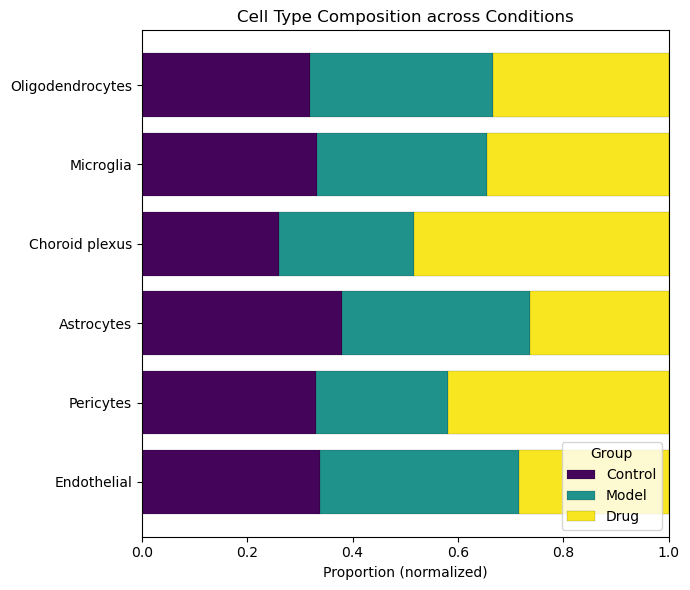

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 统计样本中每个细胞类型的比例
ct_counts = pd.crosstab(adata.obs['sample'], adata.obs['cell_type'])
ct_props = ct_counts.div(ct_counts.sum(axis=1), axis=0)
# Step 2: 分组均值（需要确保 sample 名称中有 control/model/drug 的关键词）
grouped = {
    'control': ct_props.loc[ct_props.index.str.contains("ctrl")].mean(),
    'model': ct_props.loc[ct_props.index.str.contains("model")].mean(),
    'drug': ct_props.loc[ct_props.index.str.contains("drug")].mean(),
}
# 你已有的：每组对应 Series，索引是细胞类型
df = pd.DataFrame(grouped)  # index: cell_type, columns: group

# 设置细胞类型显示顺序
cell_order = [
    'Endothelial', 'Pericytes','Astrocytes', 'Choroid plexus',
        'Microglia','Oligodendrocytes'  
]
cell_order_valid = [ct for ct in cell_order if ct in df.index]

# 重新排序并归一化（行和为1）
df = df.loc[cell_order_valid]
df_norm = df.div(df.sum(axis=1), axis=0)  # 每行归一化

# 设置颜色
colors = {
    'control': '#44045A',   
    'model': '#1F928B',    
    'drug': '#F8E620'      
}

# 绘图：横向堆叠条形图
fig, ax = plt.subplots(figsize=(7, 6))

left = [0] * len(df_norm)  # 起始位置
for group in ['control', 'model', 'drug']:
    ax.barh(df_norm.index, df_norm[group], left=left,
            label=group.capitalize(), color=colors[group],
            edgecolor='black',linewidth=0.1)
    # 更新 left 为下次绘图起点
    left = [i + j for i, j in zip(left, df_norm[group])]

# 美化
ax.set_xlim(0, 1)
ax.set_xlabel("Proportion (normalized)")
ax.set_title("Cell Type Composition across Conditions")
ax.legend(title="Group", loc='lower right')
plt.tight_layout()
plt.savefig("figures/cell_type_proportions.pdf", format='pdf')
plt.show()

In [58]:
import liana
import pandas as pd

# 假设你已经有adata对象
# 细胞表达数据
expression_matrix = adata.raw.X  # 或者使用 adata.X，根据需要选择

# 细胞类型信息
cell_types = adata.obs['cell_type']  # 这列是细胞的类型信息

# 其他的元数据（例如样本信息）
metadata = adata.obs[['sample', 'cell_type']]

# 配体-受体数据库：你可以选择liana的默认数据库，或者使用你自己的数据库
receptor_ligand_database = "interaction_table.csv"  # 可以是数据库的路径或者数据库的名称


In [59]:
from liana.method import cellphonedb  # 直接调用 cellphonedb
adata.raw = adata
  # 禁用 .raw，使用 adata.X 中的数据
# 运行细胞通讯分析
cellphonedb(
    adata=adata,
    groupby='cell_type',# 表示细胞类型的列名
    resource_name='mouseconsensus',  
    expr_prop=0.01,
    min_cells=2,
    de_method='t-test',
    n_perms=1000,
    seed=1337,
    n_jobs=1,
    verbose=True
)

adata.uns['liana_res'].head()

Using resource `mouseconsensus`.
Using `.raw`!
Converting to sparse csr matrix!
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.89 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 13074 samples and 62 features


100%|██████████| 1000/1000 [00:02<00:00, 388.47it/s]


,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
61,Pigf,Pigf,0.068619,0.044177,Flt1,Flt1,3.066920,0.873860,Choroid plexus,Endothelial,1.567770,0.0
54,Pigf,Pigf,0.045407,0.021164,Flt1,Flt1,3.066920,0.873860,Astrocytes,Endothelial,1.556164,0.0
72,Pigf,Pigf,0.042289,0.019909,Flt1,Flt1,3.066920,0.873860,Oligodendrocytes,Endothelial,1.554605,0.0
76,Pigf,Pigf,0.039825,0.014563,Flt1,Flt1,3.066920,0.873860,Pericytes,Endothelial,1.553372,0.0
161,Cxcl12,Cxcl12,2.210666,0.647416,Itga4,Itga4,0.242943,0.092233,Endothelial,Pericytes,1.226804,0.0


In [60]:
# 分别提取不同的组
drug_adata = adata[adata.obs['sample'] == 'drug'].copy()
model_adata = adata[adata.obs['sample'] == 'model'].copy()
ctrl_adata = adata[adata.obs['sample'] == 'ctrl'].copy()

# 检查每个子集的数据是否正确
print(drug_adata.shape)
print(model_adata.shape)
print(ctrl_adata.shape)

from liana.method import cellphonedb

# 为 smi 组创建细胞通讯分析
drug_results = cellphonedb(
    adata=drug_adata,
    groupby='cell_type',  # 表示细胞类型的列名
    resource_name='mouseconsensus',  
    expr_prop=0.01,
    min_cells=2,
    de_method='t-test',
    n_perms=1000,
    seed=1337,
    n_jobs=1,
    verbose=True
)
# 为 model 组创建细胞通讯分析
model_results = cellphonedb(
    adata=model_adata,
    groupby='cell_type',
    resource_name='mouseconsensus',  
    expr_prop=0.01,
    min_cells=2,
    de_method='t-test',
    n_perms=1000,
    seed=1337,
    n_jobs=1,
    verbose=True
)
# 为 ctrl 组创建细胞通讯分析
ctrl_results = cellphonedb(
    adata=ctrl_adata,
    groupby='cell_type',
    resource_name='mouseconsensus',  
    expr_prop=0.01,
    min_cells=2,
    de_method='t-test',
    n_perms=1000,
    seed=1337,
    n_jobs=1,
    verbose=True
)

Using resource `mouseconsensus`.
Using `.raw`!
Converting to sparse csr matrix!
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
111 features of mat are empty, they will be removed.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.89 of entities in the resource are missing from the data.


(3977, 2000)
(4758, 2000)
(4339, 2000)
Generating ligand-receptor stats for 3977 samples and 60 features


100%|██████████| 1000/1000 [00:01<00:00, 525.70it/s]
Using resource `mouseconsensus`.
Using `.raw`!
Converting to sparse csr matrix!
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
110 features of mat are empty, they will be removed.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.89 of entities in the resource are missing from th

Generating ligand-receptor stats for 4758 samples and 60 features


100%|██████████| 1000/1000 [00:01<00:00, 516.04it/s]
Using resource `mouseconsensus`.
Using `.raw`!
Converting to sparse csr matrix!
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
104 features of mat are empty, they will be removed.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.89 of entities in the resource are missing from th

Generating ligand-receptor stats for 4339 samples and 57 features


100%|██████████| 1000/1000 [00:01<00:00, 512.98it/s]


In [61]:
drug_adata.uns['liana_res'].head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
60,Pigf,Pigf,0.080677,0.053571,Flt1,Flt1,3.031660,0.863905,Choroid plexus,Endothelial,1.556169,0.0
53,Pigf,Pigf,0.050601,0.019391,Flt1,Flt1,3.031660,0.863905,Astrocytes,Endothelial,1.541131,0.0
71,Pigf,Pigf,0.037908,0.016770,Flt1,Flt1,3.031660,0.863905,Oligodendrocytes,Endothelial,1.534784,0.0
76,Pigf,Pigf,0.035303,0.012500,Flt1,Flt1,3.031660,0.863905,Pericytes,Endothelial,1.533482,0.0
170,Cxcl12,Cxcl12,2.068597,0.609467,Itga4,Itga4,0.237077,0.087500,Endothelial,Pericytes,1.152837,0.0


In [62]:
import pandas as pd

# 提取每个对象的 liana_res
drug_results = drug_adata.uns['liana_res']
model_results = model_adata.uns['liana_res']
ctrl_results = ctrl_adata.uns['liana_res']

# 保留 p-value < 0.05 的配受体对
drug_results_filtered = drug_results[drug_results['cellphone_pvals'] < 0.05]
model_results_filtered = model_results[model_results['cellphone_pvals'] < 0.05]
ctrl_results_filtered = ctrl_results[ctrl_results['cellphone_pvals'] < 0.05]

# 提取我们需要的列： ligand, receptor, lr_means
drug_results_filtered = drug_results_filtered[['ligand', 'receptor', 'lr_means', 'source', 'target']]
model_results_filtered = model_results_filtered[['ligand', 'receptor', 'lr_means', 'source', 'target']]
ctrl_results_filtered = ctrl_results_filtered[['ligand', 'receptor', 'lr_means', 'source', 'target']]

# 合并这三个结果，按 ligand 和 receptor 配对
merged_results = pd.merge(drug_results_filtered, model_results_filtered, on=['ligand', 'receptor', 'source', 'target'], suffixes=('_smi', '_model'))
merged_results = pd.merge(merged_results, ctrl_results_filtered, on=['ligand', 'receptor', 'source', 'target'])

# 计算 IAB,g1g2 和 RLAB,g1g2
# IAB,g1g2 = lr_means 对应的 smi, model, ctrl 值
merged_results['IAB_g1g2_drug'] = merged_results['lr_means_smi']
merged_results['IAB_g1g2_model'] = merged_results['lr_means_model']
merged_results['IAB_g1g2_ctrl'] = merged_results['lr_means']

In [63]:
import pandas as pd

# 从 _adata 中提取 liana 结果
drug_df = drug_adata.uns['liana_res'].groupby(['source', 'target'])['lr_means'].mean().reset_index()
drug_df.rename(columns={'lr_means': 'value'}, inplace=True)

# 只保留必要的列
drug_df = drug_df[['source', 'target', 'value']]

# 保存为 CSV
drug_df.to_csv('figures/drug_chord.csv', index=False)

In [64]:
import pandas as pd

# 取出 liana 结果
# 先聚合：每个 source-target 对只保留一个 lr_means（比如取平均值）
ctrl_df = ctrl_adata.uns['liana_res'].groupby(['source', 'target'])['lr_means'].mean().reset_index()
ctrl_df.rename(columns={'lr_means': 'ctrl'}, inplace=True)

model_df = model_adata.uns['liana_res'].groupby(['source', 'target'])['lr_means'].mean().reset_index()
model_df.rename(columns={'lr_means': 'model'}, inplace=True)

smi_df = drug_adata.uns['liana_res'].groupby(['source', 'target'])['lr_means'].mean().reset_index()
smi_df.rename(columns={'lr_means': 'smi'}, inplace=True)
smi_df.to_csv("figures/smi_chord_data.csv", index=False)
# 合并
merged_df = ctrl_df.merge(model_df, on=['source', 'target'], how='outer')
merged_df = merged_df.merge(smi_df, on=['source', 'target'], how='outer')
merged_df = merged_df.fillna(0)

# 差异列
merged_df['model_vs_ctrl'] = merged_df['model'] - merged_df['ctrl']
merged_df['smi_vs_ctrl'] = merged_df['smi'] - merged_df['ctrl']

# 选择差异显著的通信对
model_diff_df = merged_df[merged_df['model_vs_ctrl'].abs() > 0.01][['source', 'target', 'model_vs_ctrl']]
smi_diff_df = merged_df[merged_df['smi_vs_ctrl'].abs() > 0.01][['source', 'target', 'smi_vs_ctrl']]

# 重命名统一列名
model_diff_df.columns = ['source', 'target', 'value']
smi_diff_df.columns = ['source', 'target', 'value']

# 保存为 CSV 文件供 R 使用
model_diff_df.to_csv('figures/model_vs_ctrl_chord.csv', index=False)
smi_diff_df.to_csv('figures/smi_vs_ctrl_chord.csv', index=False)


In [65]:
print(merged_results.head())

   ligand receptor  lr_means_smi            source       target  \
0    Pigf     Flt1      1.556169    Choroid plexus  Endothelial   
1    Pigf     Flt1      1.541131        Astrocytes  Endothelial   
2    Pigf     Flt1      1.534784  Oligodendrocytes  Endothelial   
3  Cxcl12    Itga4      1.152837       Endothelial    Pericytes   
4  Cxcl12    Itga4      1.066066       Endothelial    Microglia   

   lr_means_model  lr_means  IAB_g1g2_drug  IAB_g1g2_model  IAB_g1g2_ctrl  
0        1.552475  1.589491       1.556169        1.552475       1.589491  
1        1.537383  1.589962       1.541131        1.537383       1.589962  
2        1.548408  1.578072       1.534784        1.548408       1.578072  
3        1.305732  1.183007       1.152837        1.305732       1.183007  
4        1.224931  1.084812       1.066066        1.224931       1.084812  


In [66]:
#计算pearson相关系数

In [67]:
import numpy as np
from scipy.spatial.distance import cdist

def compute_spatial_weighted_corr(adata, ligand, receptor, source_type, target_type):
    # 提取空间坐标和表达
    coords = adata.obsm["spatial"]
    expr = adata.to_df()  # 转为 DataFrame，列为基因，行名为 cell_id
    
    # 选出 A/B 类型细胞
    A_idx = adata.obs["cell_type"] == source_type
    B_idx = adata.obs["cell_type"] == target_type

    if A_idx.sum() == 0 or B_idx.sum() == 0:
        return np.nan

    coords_A = coords[A_idx]
    coords_B = coords[B_idx]

    xa = expr.loc[A_idx, ligand].values
    yb = expr.loc[B_idx, receptor].values

    # 距离矩阵 + 带宽 h
    dist_matrix = cdist(coords_A, coords_B)  # A x B
    h = np.median(dist_matrix)
    if h == 0:  # 避免带宽为0
        return np.nan

    wab = np.exp(-dist_matrix ** 2 / (2 * h ** 2))  # A x B

    # x_w, y_w（广播）
    xw = np.sum(wab * xa[:, None]) / np.sum(wab)
    yw = np.sum(wab * yb[None, :]) / np.sum(wab)

    numerator = np.sum(wab * (xa[:, None] - xw) * (yb[None, :] - yw))
    denom_x = np.sqrt(np.sum(wab * (xa[:, None] - xw)**2))
    denom_y = np.sqrt(np.sum(wab * (yb[None, :] - yw)**2))

    if denom_x == 0 or denom_y == 0:
        return np.nan

    r = numerator / (denom_x * denom_y)
    return r


In [68]:
# 为结果DataFrame添加三列
merged_results["rc_ABg1g2"] = np.nan
merged_results["rm_ABg1g2"] = np.nan
merged_results["rd_ABg1g2"] = np.nan

for i, row in merged_results.iterrows():
    ligand = row["ligand"]
    receptor = row["receptor"]
    source = row["source"]
    target = row["target"]

    try:
        rc = compute_spatial_weighted_corr(adata_ctrl, ligand, receptor, source, target)
        rm = compute_spatial_weighted_corr(adata_model, ligand, receptor, source, target)
        rd = compute_spatial_weighted_corr(adata_drug, ligand, receptor, source, target)
    except Exception as e:
        print(f"Error at row {i}: {e}")
        rc = rm = rd = np.nan

    merged_results.at[i, "rc_ABg1g2"] = rc
    merged_results.at[i, "rm_ABg1g2"] = rm
    merged_results.at[i, "rd_ABg1g2"] = rd


In [69]:
print(merged_results.head())

   ligand receptor  lr_means_smi            source       target  \
0    Pigf     Flt1      1.556169    Choroid plexus  Endothelial   
1    Pigf     Flt1      1.541131        Astrocytes  Endothelial   
2    Pigf     Flt1      1.534784  Oligodendrocytes  Endothelial   
3  Cxcl12    Itga4      1.152837       Endothelial    Pericytes   
4  Cxcl12    Itga4      1.066066       Endothelial    Microglia   

   lr_means_model  lr_means  IAB_g1g2_drug  IAB_g1g2_model  IAB_g1g2_ctrl  \
0        1.552475  1.589491       1.556169        1.552475       1.589491   
1        1.537383  1.589962       1.541131        1.537383       1.589962   
2        1.548408  1.578072       1.534784        1.548408       1.578072   
3        1.305732  1.183007       1.152837        1.305732       1.183007   
4        1.224931  1.084812       1.066066        1.224931       1.084812   

   rc_ABg1g2  rm_ABg1g2  rd_ABg1g2  
0   0.008008   0.001409  -0.000521  
1  -0.001935   0.001997   0.001840  
2   0.000337   0.000695

In [70]:
merged_results["IsAB_g1g2_ctrl"] = merged_results["IAB_g1g2_ctrl"] * merged_results["rc_ABg1g2"]
merged_results["IsAB_g1g2_model"] = merged_results["IAB_g1g2_model"] * merged_results["rm_ABg1g2"]
merged_results["IsAB_g1g2_drug"] = merged_results["IAB_g1g2_drug"] * merged_results["rd_ABg1g2"]


In [71]:
print(merged_results.head())

   ligand receptor  lr_means_smi            source       target  \
0    Pigf     Flt1      1.556169    Choroid plexus  Endothelial   
1    Pigf     Flt1      1.541131        Astrocytes  Endothelial   
2    Pigf     Flt1      1.534784  Oligodendrocytes  Endothelial   
3  Cxcl12    Itga4      1.152837       Endothelial    Pericytes   
4  Cxcl12    Itga4      1.066066       Endothelial    Microglia   

   lr_means_model  lr_means  IAB_g1g2_drug  IAB_g1g2_model  IAB_g1g2_ctrl  \
0        1.552475  1.589491       1.556169        1.552475       1.589491   
1        1.537383  1.589962       1.541131        1.537383       1.589962   
2        1.548408  1.578072       1.534784        1.548408       1.578072   
3        1.305732  1.183007       1.152837        1.305732       1.183007   
4        1.224931  1.084812       1.066066        1.224931       1.084812   

   rc_ABg1g2  rm_ABg1g2  rd_ABg1g2  IsAB_g1g2_ctrl  IsAB_g1g2_model  \
0   0.008008   0.001409  -0.000521        0.012728         0.00

In [72]:
# 计算 RLAB,g1g2
merged_results['RLAB_g1g2'] = (merged_results['IsAB_g1g2_drug'] - merged_results['IsAB_g1g2_model']) / (merged_results['IsAB_g1g2_ctrl'] - merged_results['IsAB_g1g2_model'])

# 输出筛选后的结果
print(merged_results[['ligand', 'receptor', 'source', 'target', 'RLAB_g1g2']].head())


   ligand receptor            source       target  RLAB_g1g2
0    Pigf     Flt1    Choroid plexus  Endothelial  -0.284464
1    Pigf     Flt1        Astrocytes  Endothelial   0.038261
2    Pigf     Flt1  Oligodendrocytes  Endothelial   3.843909
3  Cxcl12    Itga4       Endothelial    Pericytes  -5.232225
4  Cxcl12    Itga4       Endothelial    Microglia  -1.287677


In [73]:
import numpy as np

# 定义一个新的列 EoRCAB_g1g2，基于 RLAB_g1g2 计算
merged_results['EoRCAB_g1g2'] = np.where(
    (1 - np.abs(1 - merged_results['RLAB_g1g2'])) <= 0, 
    0, 
    1
)

# 查看结果
print(merged_results[['ligand', 'receptor', 'source', 'target', 'RLAB_g1g2', 'EoRCAB_g1g2']].head())


   ligand receptor            source       target  RLAB_g1g2  EoRCAB_g1g2
0    Pigf     Flt1    Choroid plexus  Endothelial  -0.284464            0
1    Pigf     Flt1        Astrocytes  Endothelial   0.038261            1
2    Pigf     Flt1  Oligodendrocytes  Endothelial   3.843909            0
3  Cxcl12    Itga4       Endothelial    Pericytes  -5.232225            0
4  Cxcl12    Itga4       Endothelial    Microglia  -1.287677            0


In [74]:
import os
import json
import networkx as nx
from itertools import combinations
from collections import defaultdict


In [75]:
#读取所有 PPI 图
ppi_dir = "PPI_result"
ppi_graphs = {}

for file in os.listdir(ppi_dir):
    if file.endswith("_PPI.json"):
        cell_type = file.replace("_PPI.json", "")
        with open(os.path.join(ppi_dir, file)) as f:
            interactions = json.load(f)

        # 初始化图
        G = nx.Graph()
        for entry in interactions:
            g1 = entry['preferredName_A']
            g2 = entry['preferredName_B']
            score = entry.get('score', 0.0)
            G.add_edge(g1, g2, weight=score)
        
        ppi_graphs[cell_type] = G


In [76]:
#构建细胞类型对的并集图
# 所有细胞类型两两组合（不重复）
cell_type_pairs = list(combinations(ppi_graphs.keys(), 2))

# 用于保存每个细胞类型对的中心性
bc_results = defaultdict(dict)


In [77]:
#为每一细胞类型对计算节点中心性
for ct1, ct2 in cell_type_pairs:
    print(f"计算 {ct1} 与 {ct2} 的并集图...")

    # 获取各自图
    G1 = ppi_graphs[ct1]
    G2 = ppi_graphs[ct2]

    # 合并图
    G_union = nx.compose(G1, G2)  # networkx 提供的图并集函数

    # 计算介数中心性（节点级）
    bc = nx.betweenness_centrality(G_union, normalized=True)

    # 保存
    bc_results[(ct1, ct2)] = bc


计算 Pericytes 与 Astrocytes 的并集图...
计算 Pericytes 与 Oligodendrocytes 的并集图...
计算 Pericytes 与 Endothelial 的并集图...
计算 Pericytes 与 Choroid plexus 的并集图...
计算 Pericytes 与 Microglia 的并集图...
计算 Astrocytes 与 Oligodendrocytes 的并集图...
计算 Astrocytes 与 Endothelial 的并集图...
计算 Astrocytes 与 Choroid plexus 的并集图...
计算 Astrocytes 与 Microglia 的并集图...
计算 Oligodendrocytes 与 Endothelial 的并集图...
计算 Oligodendrocytes 与 Choroid plexus 的并集图...
计算 Oligodendrocytes 与 Microglia 的并集图...
计算 Endothelial 与 Choroid plexus 的并集图...
计算 Endothelial 与 Microglia 的并集图...
计算 Choroid plexus 与 Microglia 的并集图...


In [78]:
lr_centrality_scores = []

for _, row in merged_results.iterrows():
    ct_pair = tuple(sorted([row['source'], row['target']]))
    g1 = row['ligand']
    g2 = row['receptor']

    bc_dict = bc_results.get(ct_pair, {})

    bc_g1 = bc_dict.get(g1, 0.0)
    bc_g2 = bc_dict.get(g2, 0.0)

    lr_centrality_scores.append({
        'source': row['source'],
        'target': row['target'],
        'ligand': g1,
        'receptor': g2,
        'BC_AB_g1': bc_g1,
        'BC_AB_g2': bc_g2
    })
    
import pandas as pd
B_centrality_df = pd.DataFrame(lr_centrality_scores)


In [79]:
# 计算 ligand 和 receptor 的中心性均值
B_centrality_df['BC_AB_g1g2'] = (B_centrality_df['BC_AB_g1'] + B_centrality_df['BC_AB_g2']) / 2
print(B_centrality_df.head())

             source       target  ligand receptor  BC_AB_g1  BC_AB_g2  \
0    Choroid plexus  Endothelial    Pigf     Flt1  0.000000   0.00000   
1        Astrocytes  Endothelial    Pigf     Flt1  0.000000   0.03797   
2  Oligodendrocytes  Endothelial    Pigf     Flt1  0.000000   0.00000   
3       Endothelial    Pericytes  Cxcl12    Itga4  0.000000   0.00000   
4       Endothelial    Microglia  Cxcl12    Itga4  0.038623   0.00000   

   BC_AB_g1g2  
0    0.000000  
1    0.018985  
2    0.000000  
3    0.000000  
4    0.019311  


In [80]:
# 与 merged_results 合并
BC_results = merged_results.merge(B_centrality_df, on=['source', 'target', 'ligand', 'receptor'], how='left')
import pandas as pd

# 假设 BC_results 已经是一个 DataFrame，接下来计算 EoRCAB_g1g2 列
#BC_results['EoRCAB_g1g2'] = (1 - abs(1 - BC_results['RLAB_g1g2'])) > 0

# 将布尔值转换为 1 或 0
#BC_results['EoRCAB_g1g2'] = BC_results['EoRCAB_g1g2'].astype(int)

# 查看结果
print(BC_results.head())

   ligand receptor  lr_means_smi            source       target  \
0    Pigf     Flt1      1.556169    Choroid plexus  Endothelial   
1    Pigf     Flt1      1.541131        Astrocytes  Endothelial   
2    Pigf     Flt1      1.534784  Oligodendrocytes  Endothelial   
3  Cxcl12    Itga4      1.152837       Endothelial    Pericytes   
4  Cxcl12    Itga4      1.066066       Endothelial    Microglia   

   lr_means_model  lr_means  IAB_g1g2_drug  IAB_g1g2_model  IAB_g1g2_ctrl  \
0        1.552475  1.589491       1.556169        1.552475       1.589491   
1        1.537383  1.589962       1.541131        1.537383       1.589962   
2        1.548408  1.578072       1.534784        1.548408       1.578072   
3        1.305732  1.183007       1.152837        1.305732       1.183007   
4        1.224931  1.084812       1.066066        1.224931       1.084812   

   ...  rm_ABg1g2  rd_ABg1g2  IsAB_g1g2_ctrl  IsAB_g1g2_model  IsAB_g1g2_drug  \
0  ...   0.001409  -0.000521        0.012728         

In [81]:
BC_results["CCRS_ABg1g2"] = BC_results["EoRCAB_g1g2"] * BC_results["BC_AB_g1g2"]
print(BC_results[["source","target","ligand", "receptor", "EoRCAB_g1g2", "BC_AB_g1g2", "CCRS_ABg1g2"]].head())


             source       target  ligand receptor  EoRCAB_g1g2  BC_AB_g1g2  \
0    Choroid plexus  Endothelial    Pigf     Flt1            0    0.000000   
1        Astrocytes  Endothelial    Pigf     Flt1            1    0.018985   
2  Oligodendrocytes  Endothelial    Pigf     Flt1            0    0.000000   
3       Endothelial    Pericytes  Cxcl12    Itga4            0    0.000000   
4       Endothelial    Microglia  Cxcl12    Itga4            0    0.019311   

   CCRS_ABg1g2  
0     0.000000  
1     0.018985  
2     0.000000  
3     0.000000  
4     0.000000  


In [82]:
# 按 source-target 分组，计算 CCRS_AB = sum(BC_AB_g1g2 × EoRCAB_g1g2)
ccrs_df = (
    BC_results
    .groupby(['source', 'target'])
    .apply(lambda df: (df['BC_AB_g1g2'] * df['EoRCAB_g1g2']).sum())
    .reset_index(name='CCRS_AB')
)
print(ccrs_df.head())


           source       target   CCRS_AB
0      Astrocytes   Astrocytes  0.000000
1      Astrocytes  Endothelial  0.019422
2      Astrocytes    Microglia  0.001617
3      Astrocytes    Pericytes  0.000000
4  Choroid plexus  Endothelial  0.000000


/tmp/ipykernel_58708/757550092.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [83]:
#排序输出前几位的关键细胞对：
ccrs_df_sorted = ccrs_df.sort_values(by='CCRS_AB', ascending=False)
print(ccrs_df_sorted.head(10))

              source       target   CCRS_AB
8        Endothelial    Microglia  0.041894
1         Astrocytes  Endothelial  0.019422
2         Astrocytes    Microglia  0.001617
0         Astrocytes   Astrocytes  0.000000
11         Microglia    Microglia  0.000000
16         Pericytes    Microglia  0.000000
15         Pericytes  Endothelial  0.000000
14  Oligodendrocytes    Pericytes  0.000000
13  Oligodendrocytes    Microglia  0.000000
12  Oligodendrocytes  Endothelial  0.000000


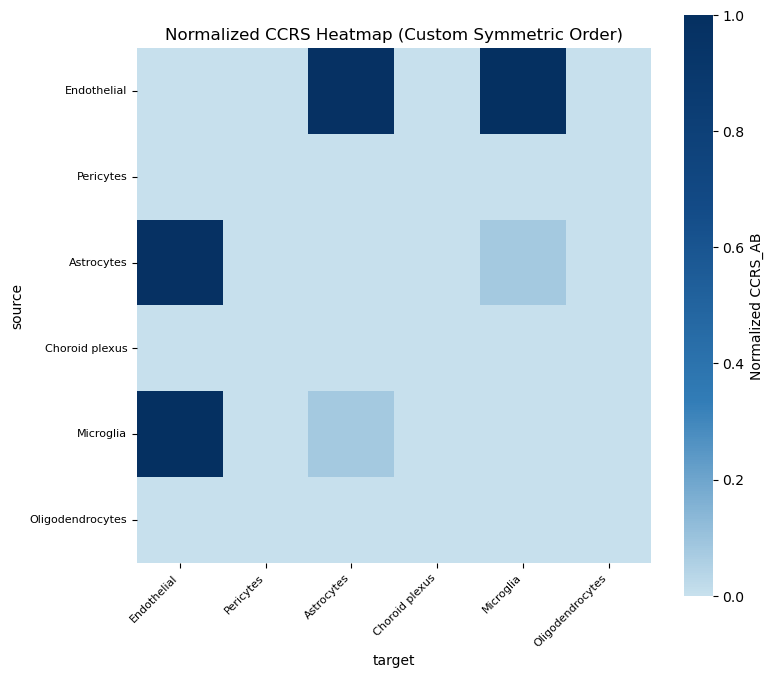

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Step 1: 构造对称矩阵（合并 source ➝ target 和 target ➝ source）
df_sym = pd.concat([
    ccrs_df,
    ccrs_df.rename(columns={'source': 'target', 'target': 'source'})
])
df_sym = df_sym.groupby(['source', 'target'], as_index=False).mean()

# Step 2: pivot 成矩阵
ccrs_matrix = df_sym.pivot(index='source', columns='target', values='CCRS_AB')


# 2. 自定义行和列的顺序
custom_order = [
    'Endothelial', 'Pericytes','Astrocytes', 'Choroid plexus',
        'Microglia','Oligodendrocytes'
]

# 3: 重排序，保证对称、无 NaN
ccrs_matrix = ccrs_matrix.reindex(index=custom_order, columns=custom_order)
ccrs_matrix = ccrs_matrix.fillna(0)
# 4. 归一化 CCRS_AB 到 [0, 1]
# 对数变换（log1p），拉伸低值，抑制高值
#ccrs_log = np.log1p(ccrs_matrix)
# 归一化到0-1
#ccrs_log_norm = (ccrs_log - ccrs_log.min().min()) / (ccrs_log.max().max() - ccrs_log.min().min())
#ccrs_matrix_normalized = (ccrs_matrix - ccrs_matrix.min().min()) / (ccrs_matrix.max().max() - ccrs_matrix.min().min())
# 计算95%分位数，用作 vmax 阈值（这里对原始数据，不是log）
vmax_val = np.percentile(ccrs_matrix.values.flatten(), 95)
# 重新归一化，确保 vmax_val 映射为1，vmax_val以外的值饱和
ccrs_norm_clip = np.clip(ccrs_matrix, None, vmax_val)
ccrs_norm_clip = (ccrs_norm_clip - ccrs_norm_clip.min().min()) / (vmax_val - ccrs_norm_clip.min().min())
my_cmap = LinearSegmentedColormap.from_list(
    "refined",
    [ "#C7E0ED", "#327DB7","#134B87", "#053061"]
)
# 6. 绘图
plt.figure(figsize=(8, 7))
ax = sns.heatmap(
    ccrs_norm_clip,
    cmap=my_cmap,
    square=True,
    linewidths=0.001,
    linecolor='white',
    cbar_kws={'label': 'Normalized CCRS_AB'},
    xticklabels=True,
    yticklabels=True
)

# 7. 标签和美化
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title("Normalized CCRS Heatmap (Custom Symmetric Order)", fontsize=12)
plt.tight_layout()

# 8. 保存图像
plt.savefig("figures/heatmap_CCRS.pdf", dpi=300)
plt.show()


In [85]:
# Step 1: 统计每个细胞类型作为 source 的 CCRS_AB 之和
ccrs_sum_by_source = ccrs_df_sorted.groupby('source')['CCRS_AB'].sum().reset_index()
ccrs_sum_by_source.columns = ['Cell Type', 'CCRS_sum']

# Step 2: 合并到 NRI_df
NRI_with_CCRS = pd.merge(NRI_df, ccrs_sum_by_source, on='Cell Type', how='left')

# ✅: 分别标准化 NRI 和 CCRS_sum 到 0-1 区间
NRI_min, NRI_max = NRI_with_CCRS['NRI'].min(), NRI_with_CCRS['NRI'].max()
CCRS_min, CCRS_max = NRI_with_CCRS['CCRS_sum'].min(), NRI_with_CCRS['CCRS_sum'].max()

NRI_with_CCRS['NRI_norm'] = (NRI_with_CCRS['NRI'] - NRI_min) / (NRI_max - NRI_min)
NRI_with_CCRS['CCRS_norm'] = (NRI_with_CCRS['CCRS_sum'] - CCRS_min) / (CCRS_max - CCRS_min)

# Step 3: 计算 STARidx
NRI_with_CCRS['STARidx'] = 0.5* NRI_with_CCRS['NRI_norm'] + 0.5 * NRI_with_CCRS['CCRS_norm']

# 查看结果
print(NRI_with_CCRS)

          Cell Type         NRI  CCRS_sum  NRI_norm  CCRS_norm   STARidx
0        Astrocytes   35.066148  0.021038  0.229408   0.502187  0.365797
1    Choroid plexus   99.250015  0.000000  0.675198   0.000000  0.337599
2       Endothelial   86.447893  0.041894  0.586281   1.000000  0.793140
3         Microglia   66.991834  0.000000  0.451148   0.000000  0.225574
4  Oligodendrocytes    2.036617  0.000000  0.000000   0.000000  0.000000
5         Pericytes  146.014154  0.000000  1.000000   0.000000  0.500000


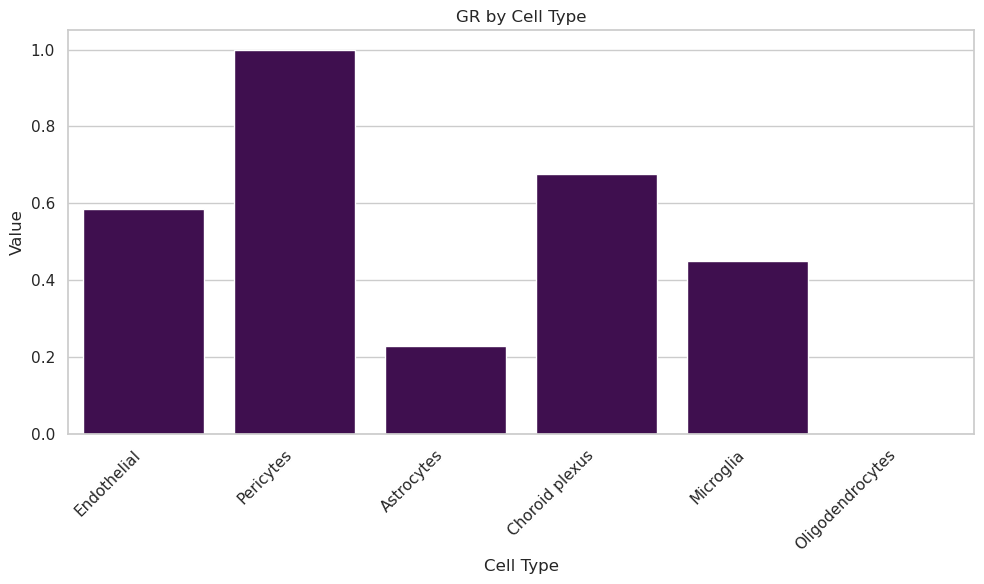

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表风格
sns.set(style="whitegrid")

# 长格式数据
melted_data = NRI_with_CCRS.melt(id_vars="Cell Type", value_vars=["NRI_norm"], 
                                 var_name="Metric", value_name="Value")

custom_order = [
     'Endothelial', 'Pericytes','Astrocytes', 'Choroid plexus',
        'Microglia','Oligodendrocytes'
]

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x="Cell Type", y="Value", data=melted_data, color="#44045A", order=custom_order)

# 图形美化
plt.title("GR by Cell Type")
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签
plt.tight_layout()
#plt.savefig("figures/GR by Cell Type.pdf", format='pdf')
plt.show()

In [87]:
# 对每个细胞类型 - 基因，计算 ligand 参与的 CCRS 平均值
ligand_ccrs = BC_results.groupby(["source", "ligand"])["CCRS_ABg1g2"].mean().reset_index()
ligand_ccrs.columns = ["Cell Type", "Gene", "CCRS_mean"]

# 同理，receptor：
receptor_ccrs = BC_results.groupby(["target", "receptor"])["CCRS_ABg1g2"].mean().reset_index()
receptor_ccrs.columns = ["Cell Type", "Gene", "CCRS_mean"]

# 合并 ligand 和 receptor 数据
ccrs_gene_df = pd.concat([ligand_ccrs, receptor_ccrs], ignore_index=True)

# 同一个细胞类型 - 基因组合可能在 ligand 和 receptor 中都出现，进一步求均值
ccrs_gene_df = ccrs_gene_df.groupby(["Cell Type", "Gene"])["CCRS_mean"].mean().reset_index()

print(ccrs_gene_df.head())

    Cell Type    Gene  CCRS_mean
0  Astrocytes   Adrb1        0.0
1  Astrocytes     Bgn        0.0
2  Astrocytes    Bmp7        0.0
3  Astrocytes  Col1a2        0.0
4  Astrocytes  Cxcl12        0.0


/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
/slurm/home/yrd/fanlab/gaomeng/anaconda3/envs/env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


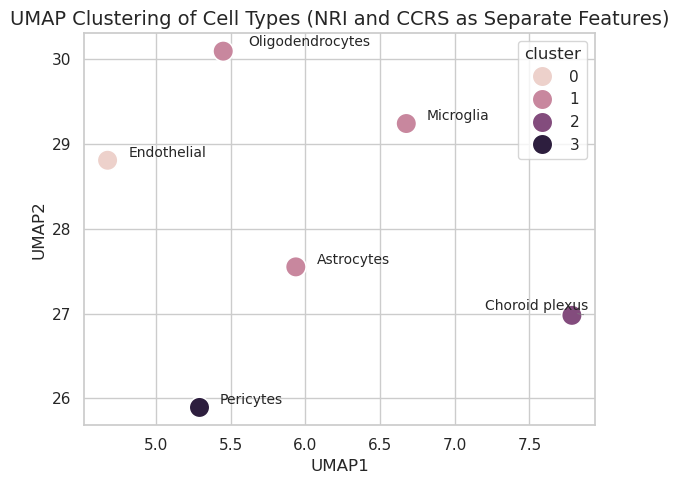

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import umap

RR_with_CCRS = RR_all.merge(ccrs_gene_df, on=["Cell Type", "Gene"], how="left")
RR_with_CCRS["CCRS_mean"] = RR_with_CCRS["CCRS_mean"].fillna(0)  # 没出现在CCI中的就设为0
# 2. 创建宽表：每个 Cell Type 是一行，每个 Gene 的 NRI / CCRS 是独立列
#    列名格式：Gene_NRI，Gene_CCRS
long_nri = RR_with_CCRS.pivot_table(index="Cell Type", columns="Gene", values="RR_all", fill_value=0)
long_ccrs = RR_with_CCRS.pivot_table(index="Cell Type", columns="Gene", values="CCRS_mean", fill_value=0)
# 重命名列区分特征
long_nri.columns = [f"{gene}_RR_all" for gene in long_nri.columns]
long_ccrs.columns = [f"{gene}_CCRS" for gene in long_ccrs.columns]
# 拼接成一个特征矩阵
matrix = pd.concat([long_nri, long_ccrs], axis=1)

# 3. 标准化
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# 4. 聚类
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(matrix_scaled)
matrix["cluster"] = kmeans.fit_predict(matrix_scaled)

# 5. UMAP 降维
reducer = umap.UMAP(n_neighbors=3, random_state=42, spread=2.0, min_dist=0.07)  # spread 控制整体拉开，min_dist 控制局部分布
umap_result = reducer.fit_transform(matrix_scaled)
matrix["UMAP1"] = umap_result[:, 0]
matrix["UMAP2"] = umap_result[:, 1]

# 6. 可视化
plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
texts = []
sns.scatterplot(data=matrix, x="UMAP1", y="UMAP2", hue="cluster", s=220)

for i in range(matrix.shape[0]):
    texts.append(
        plt.text(matrix.iloc[i]["UMAP1"] + 0.1, 
                 matrix.iloc[i]["UMAP2"], 
                 matrix.index[i], fontsize=10)
    )
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.title("UMAP Clustering of Cell Types (NRI and CCRS as Separate Features)", fontsize=14)
plt.tight_layout()
plt.savefig("figures/UMAP_NRI_CCRS_clustering.pdf")
plt.show()

In [89]:
# 筛选出 EoR_all > 0.5 的基因
ERGs_df = RR_all[RR_all["EoR_all"]>0.5][["Cell Type", "Gene", "EoR_all", "RR_all"]]
 
# 查看结果
print(ERGs_df)

     Cell Type   Gene   EoR_all    RR_all
0    Pericytes    Fos  0.515019  6.695249
2    Pericytes   Ccl3  0.611551  4.280859
3    Pericytes  Ifit1  0.614644  4.917150
4    Pericytes  Itga4  0.689167  6.891673
5    Pericytes   Ace2  0.585179  2.925894
..         ...    ...       ...       ...
211  Microglia  Rbm25  0.673216  2.692865
212  Microglia   Gnl2  0.767980  0.767980
213  Microglia   Hps4  0.811070  0.811070
214  Microglia  Sbno1  0.768185  1.536371
215  Microglia  Ep400  0.576543  0.576543

[128 rows x 4 columns]


In [90]:
#通路富集  cluster2
# 1. 获取 cluster 2 中的细胞类型
cluster2_cells = matrix[matrix["cluster"] == 1].index.tolist()

# 2. 在 RR_with_CCRS 中筛选这些细胞类型对应的 Gene
subset = ERGs_df[ERGs_df["Cell Type"].isin(cluster2_cells)]

# 3. 统计每个基因出现在哪些细胞类型中
gene_counts = subset.groupby("Gene")["Cell Type"].nunique()

# 4. 设置一个出现的“最少细胞类型数”阈值（例如超过一半）
min_required = int(len(cluster2_cells) * 0.1)

# 5. 筛选满足条件的基因
selected_genes = gene_counts[gene_counts >= min_required].index.tolist()

# 6. 查看满足条件的基因数
print(f"Cluster 1 ：{len(selected_genes)}")

# 7. 可用于富集分析的基因列表
print(selected_genes)

Cluster 1 ：33
['Acer3', 'Adgrl1', 'Ccl3', 'Ccl4', 'Ccl6', 'Cd52', 'Cd83', 'Commd9', 'Cwc25', 'Dock8', 'Ep400', 'Epas1', 'Fkbp4', 'Fos', 'Frrs1l', 'Gnl2', 'Gria4', 'Hps4', 'Il17ra', 'Itih5', 'Itpa', 'Mlph', 'Npy', 'Pltp', 'Rab27a', 'Rbm25', 'Rgs1', 'Sash3', 'Sbno1', 'Setd1b', 'Slc35f5', 'Sugt1', 'Top1']


In [91]:
# 筛选 Cell Type 为 Pericytes 的行
selected_df = ERGs_df[ERGs_df['Cell Type'] == 'Pericytes']

# 只取基因列，用于通路富集
selected = selected_df['Gene'].tolist()
print(f"基因数量为：{len(selected)}")
print(selected)

基因数量为：42
['Fos', 'Ccl3', 'Ifit1', 'Itga4', 'Ace2', 'Il17ra', 'Ccr9', 'Fkbp4', 'Sugt1', 'Grk6', 'Cwc25', 'Brd4', 'Setd1b', 'Rbm25', 'Ep400', 'Gtf2h2', 'Eng', 'Ptgds', 'Itih5', 'Rpf2', 'Dnajc4', 'Rptor', 'Srek1ip1', 'Rgs7bp', 'Pabpn1', 'Pltp', 'Taf3', 'Itpa', 'Sdccag8', 'Ggt5', 'Col23a1', 'Iigp1', 'Cog4', 'Adgrl1', 'Fzd8', 'Gng2', 'Slc6a20a', 'Sbno1', 'Zfp318', 'Phf20l1', 'Zfp62', 'Rnf213']


In [92]:
import gseapy as gp
import pandas as pd
# 你的 selected_genes 列表
gene_list = selected

# 运行富集分析（以 GO Biological Process 为例）
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=['GO_Biological_Process_2021'
                           ],
                 organism='Mouse',  # 如果是人类数据请改为 'Human'
                 outdir=None,  # 不输出到文件
                 cutoff=0.05  # 只看显著结果
                )

# 查看结果
results = enr.results

# 保留包含这些关键词的 term
keep_keywords = [# 经典AD关键词
    "alzheimer", "amyloid", "tau", "neurodegeneration", "neuroinflammation", "microglia", "astrocyte",
    "TREM2", "APP", "BACE1", "PSEN1", "PSEN2",
    # 通路机制
    "oxidative", "stress", "apoptosis", "cell death", "autophagy", "mitochondria", "lysosome",
    "synapse", "neurotransmitter", "exocytosis", "endocytosis", "axon", "dendrite", "glia",
    #免疫/炎症
    "immune", "inflammatory", "interleukin", "cytokine", "chemokine", "complement", "NF-kappaB", "TNF", "IL-1", "IL-6",
    # 代谢类
    "lipid", "cholesterol", "glucose", "insulin", "metabolic", "glycolysis",
    # 信号通路
    "MAPK", "Notch", "PI3K", "AKT", "mTOR", "Wnt", "TGF-beta", "calcium", "GTPase",
    # 血管、脑屏障
    "endothelial", "blood brain barrier", "angiogenesis", "vascular", "pericyte"
]

#mask_keep = filtered_results[filtered_results["Term"].str.lower().str.contains('|'.join(keep_keywords))&
#    (filtered_results['Adjusted P-value'] < 0.05)
#]# 最终保留结果
mask_keep = results["Term"].str.lower().str.contains('|'.join(keep_keywords))
final_results = results[mask_keep]

# 打印前10行
print(final_results[["Term", "Overlap", "Adjusted P-value", "Combined Score"]].head(10))

                                                 Term Overlap  \
0    regulation of inflammatory response (GO:0050727)   4/206   
1             calcium-mediated signaling (GO:0019722)   3/102   
5                 sprouting angiogenesis (GO:0002040)    2/52   
24                 inflammatory response (GO:0006954)   3/230   
25                  glycolipid transport (GO:0046836)     1/6   
26  release of sequestered calcium ion into cytoso...     1/6   
29  positive regulation of microglial cell activat...     1/6   
30  positive regulation of microglial cell migrati...     1/6   
39                  glial cell migration (GO:0008347)     1/7   
40  regulation of vascular associated smooth muscl...     1/7   

    Adjusted P-value  Combined Score  
0           0.124884       72.192602  
1           0.124884      102.785439  
5           0.124884      104.164220  
24          0.124884       29.357744  
25          0.124884      426.234286  
26          0.124884      426.234286  
29         

/tmp/ipykernel_58708/2531091007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


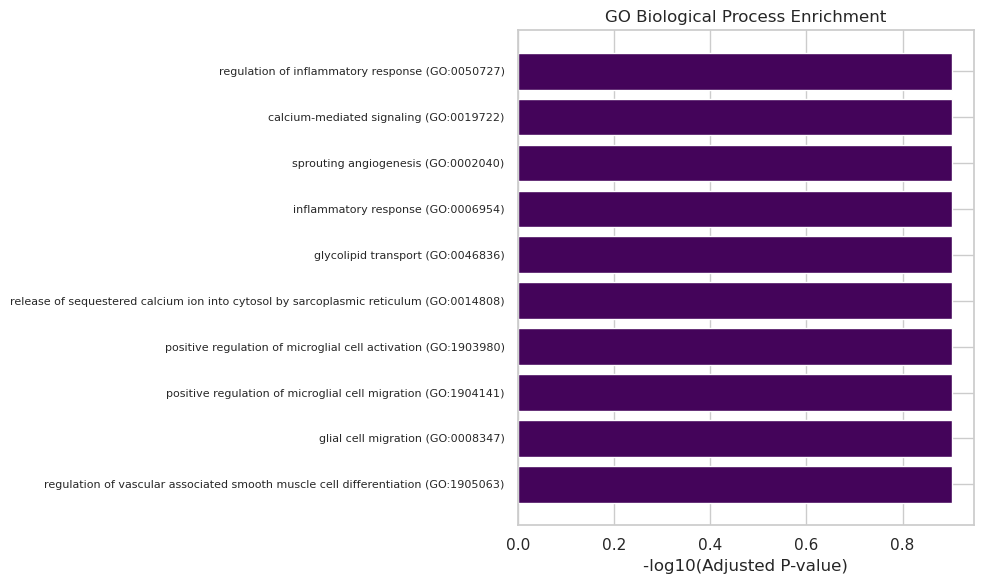

In [93]:
import matplotlib.pyplot as plt
import numpy as np

top_terms = final_results.head(10)
top_terms["minus_log10_padj"] = -np.log10(top_terms["Adjusted P-value"])

plt.figure(figsize=(10,6))
plt.barh(top_terms["Term"], top_terms["minus_log10_padj"], color="#44045A")
plt.xlabel('-log10(Adjusted P-value)')
plt.title('GO Biological Process Enrichment')
plt.gca().invert_yaxis()
plt.yticks(fontsize=8)  # y轴标签字体大小


plt.tight_layout()
# 保存为 PDF 文件
plt.savefig('/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/figures/enrichment.pdf', format='pdf',backend="cairo")

plt.show()


In [94]:
print(BC_results.head())


   ligand receptor  lr_means_smi            source       target  \
0    Pigf     Flt1      1.556169    Choroid plexus  Endothelial   
1    Pigf     Flt1      1.541131        Astrocytes  Endothelial   
2    Pigf     Flt1      1.534784  Oligodendrocytes  Endothelial   
3  Cxcl12    Itga4      1.152837       Endothelial    Pericytes   
4  Cxcl12    Itga4      1.066066       Endothelial    Microglia   

   lr_means_model  lr_means  IAB_g1g2_drug  IAB_g1g2_model  IAB_g1g2_ctrl  \
0        1.552475  1.589491       1.556169        1.552475       1.589491   
1        1.537383  1.589962       1.541131        1.537383       1.589962   
2        1.548408  1.578072       1.534784        1.548408       1.578072   
3        1.305732  1.183007       1.152837        1.305732       1.183007   
4        1.224931  1.084812       1.066066        1.224931       1.084812   

   ...  rd_ABg1g2  IsAB_g1g2_ctrl  IsAB_g1g2_model  IsAB_g1g2_drug  RLAB_g1g2  \
0  ...  -0.000521        0.012728         0.002187   

In [95]:
filtered__df = BC_results[BC_results["lr_means"] != 0]

# 去重得到唯一配受体对
unique_lr_pairs = BC_results[["ligand", "receptor",'source','target']].drop_duplicates().reset_index(drop=True)
# 1. 计算 Ir（平均值）
merged_results["Ir"] = merged_results[["lr_means_smi", "lr_means_model", "lr_means"]].mean(axis=1)

# 2. 取配对与细胞类型四元组 + Ir（防止重复）
lr_with_ir = merged_results[["ligand", "receptor", "source", "target", "Ir"]].drop_duplicates()

# 3. 合并进 unique_lr_pairs（按 ligand, receptor, source, target 匹配）
unique_lr_pairs = pd.merge(unique_lr_pairs, lr_with_ir, on=["ligand", "receptor", "source", "target"], how="left")

# 4. 查看结果
print(unique_lr_pairs.head())
print(f"filtered_df 中共有 {unique_lr_pairs.shape[0]} 个唯一的配受体对（不考虑细胞类型）")


   ligand receptor            source       target        Ir
0    Pigf     Flt1    Choroid plexus  Endothelial  1.566045
1    Pigf     Flt1        Astrocytes  Endothelial  1.556159
2    Pigf     Flt1  Oligodendrocytes  Endothelial  1.553754
3  Cxcl12    Itga4       Endothelial    Pericytes  1.213859
4  Cxcl12    Itga4       Endothelial    Microglia  1.125270
filtered_df 中共有 52 个唯一的配受体对（不考虑细胞类型）


In [96]:
# 读取原始节点信息
nodes_df = pd.read_csv('PPI_merged_for_Cytoscape/nodes.tsv', sep='\t')

# 2. 从 filtered__df 提取 ligand → source，receptor → target
ligands = filtered__df[['ligand', 'source']].rename(columns={'ligand': 'gene', 'source': 'cell_type'})
receptors = filtered__df[['receptor', 'target']].rename(columns={'receptor': 'gene', 'target': 'cell_type'})

# 3. 合并所有的 gene-cell_type 对
ligrec = pd.concat([ligands, receptors], ignore_index=True)

# 4. 聚合细胞类型信息，格式为 "Astrocyte;Endothelial"
gene2ct = ligrec.groupby('gene')['cell_type'].apply(lambda x: ';'.join(sorted(set(x)))).reset_index()
gene2ct = gene2ct.rename(columns={'cell_type': 'cell_types'})  # ✅ 关键！
# 5. 仅选出不在 nodes.tsv 中的基因
existing_genes = set(nodes_df['gene'])
new_genes_df = gene2ct[~gene2ct['gene'].isin(existing_genes)].copy()

# 6. 填充缺失字段（用 None 占位），保持列对齐
for col in nodes_df.columns:
    if col not in new_genes_df.columns:
        new_genes_df[col] = None

# 7. 调整列顺序以匹配原表
new_genes_df = new_genes_df[nodes_df.columns]

# 8. 合并并导出结果
final_nodes = pd.concat([nodes_df, new_genes_df], ignore_index=True)
final_nodes.to_csv('PPI_merged_for_Cytoscape/nodes_with_LR.tsv', sep='\t', index=False)

In [97]:
import pandas as pd

# Step 1: 读取 Cytoscape 边表
edges_df = pd.read_csv("PPI_merged_for_Cytoscape/edges.tsv", sep="\t")

# 转换为大写后构造无向键
unique_lr_pairs["ligand_upper"] = unique_lr_pairs["ligand"].str.upper()
unique_lr_pairs["receptor_upper"] = unique_lr_pairs["receptor"].str.upper()
unique_lr_pairs["lr_pair"] = unique_lr_pairs.apply(
    lambda row: tuple(sorted([row["ligand_upper"], row["receptor_upper"]])), axis=1
)

# 计算每对配受体的 Ir 平均值（不区分细胞类型）
ir_means = unique_lr_pairs.groupby("lr_pair")["Ir"].mean().reset_index()
ir_means.columns = ["lr_pair", "Ir_mean"]
lr_set = set(ir_means["lr_pair"])

# Step 3: 对 edges 中的 gene 名统一大写并构造无向 edge key
edges_df["source_upper"] = edges_df["source"].str.upper()
edges_df["target_upper"] = edges_df["target"].str.upper()
edges_df["edge_pair"] = edges_df.apply(
    lambda row: tuple(sorted([row["source_upper"], row["target_upper"]])),
    axis=1
)

# Step 4: 标记已有的 LR 边
edges_df["is_LR"] = edges_df["edge_pair"].isin(lr_set)
edges_df["Edge_type"] = edges_df["is_LR"].map({True: "Ligand-Receptor", False: "PPI"})

# Step 5: 构造缺失的 LR 对应的边（即不在 edges 中的配受体对）
existing_edges = set(edges_df["edge_pair"])
missing_pairs = lr_set - existing_edges

# 构建新的 DataFrame
missing_edges = pd.DataFrame(
    list(missing_pairs), columns=["source", "target"]
)
missing_edges["is_LR"] = True
missing_edges["Edge_type"] = "Ligand-Receptor"
missing_edges["edge_pair"] = missing_edges.apply(
    lambda row: tuple(sorted([row["source"].upper(), row["target"].upper()])), axis=1
)

# Step 6: 合并原始 edges 与新添加的 missing LR 边
combined_edges = pd.concat([
    edges_df,
    missing_edges
], ignore_index=True)

# Step 7: 合并 Ir_mean
final_edges = pd.merge(
    combined_edges,
    ir_means,
    how="left",
    left_on="edge_pair",
    right_on="lr_pair"
).drop(columns=["source_upper", "target_upper", "lr_pair", "edge_pair"])

# Step 8: 保存最终 edges 表
final_edges.to_csv("PPI_merged_for_Cytoscape/edges_3.tsv", sep="\t", index=False)

print(f"✅ edges_3.tsv 已生成，配受体对总数：{len(lr_set)}，其中新增 {len(missing_pairs)} 条边。已为配受体边添加 Ir 平均值。")


✅ edges_3.tsv 已生成，配受体对总数：26，其中新增 26 条边。已为配受体边添加 Ir 平均值。


In [98]:
n_matched = edges_df["is_LR"].sum()
print(f"✅ 成功匹配到 {n_matched} 条配受体边")
print(edges_df[edges_df["is_LR"]].head(20))

✅ 成功匹配到 0 条配受体边
Empty DataFrame
Columns: [source, target, score, source_upper, target_upper, edge_pair, is_LR, Edge_type]
Index: []


In [99]:
print(merged_results[['ligand', 'receptor','source','target','lr_means_model', 'lr_means','lr_means_smi']].head())

   ligand receptor            source       target  lr_means_model  lr_means  \
0    Pigf     Flt1    Choroid plexus  Endothelial        1.552475  1.589491   
1    Pigf     Flt1        Astrocytes  Endothelial        1.537383  1.589962   
2    Pigf     Flt1  Oligodendrocytes  Endothelial        1.548408  1.578072   
3  Cxcl12    Itga4       Endothelial    Pericytes        1.305732  1.183007   
4  Cxcl12    Itga4       Endothelial    Microglia        1.224931  1.084812   

   lr_means_smi  
0      1.556169  
1      1.541131  
2      1.534784  
3      1.152837  
4      1.066066  


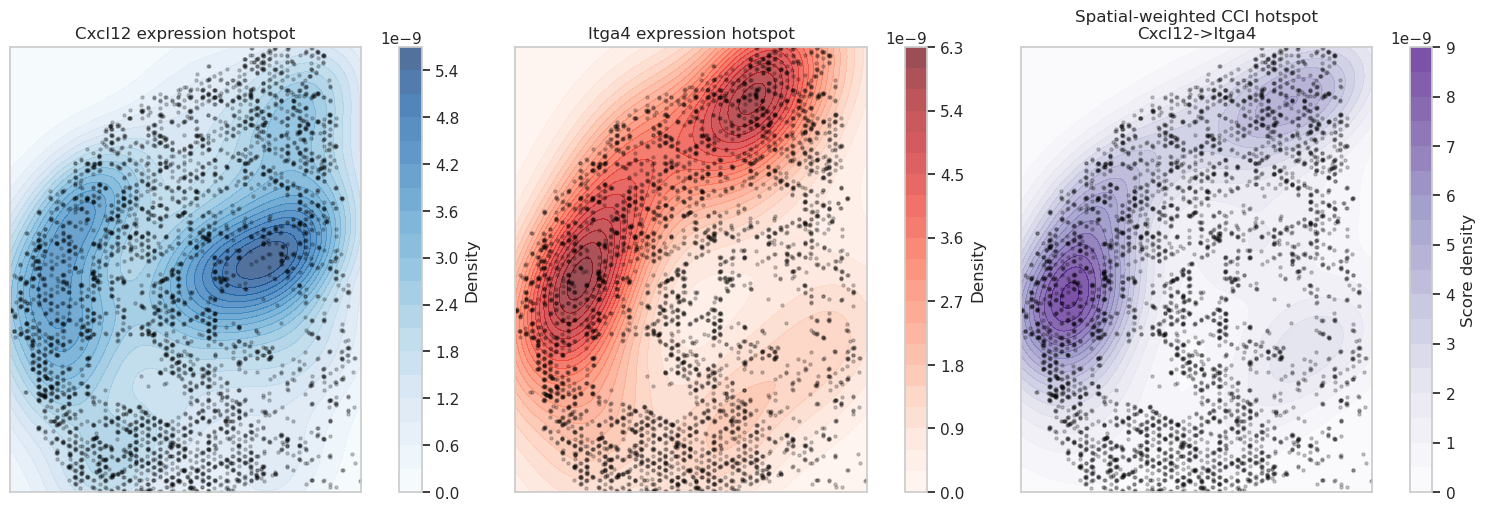

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde
import scanpy as sc

# 1. 子集：只要 model 组
adata_model = adata[adata.obs['sample'] == 'ctrl'].copy()

# 2. 选择一个 ligand-receptor pair（名字要和 var_names 对应）
ligand_gene = "Cxcl12"    # e.g., "TGFB1"
receptor_gene = "Itga4"  # e.g., "TGFBR1"

# 3. 提取空间坐标和表达（假设已经做过 log1p / 归一化）
coords = adata_model.obsm['spatial']  # (n_cells, 2)
# 如果是 sparse matrix，展开成 1d array
def get_expr(adata_obj, gene):
    if gene not in adata_obj.var_names:
        raise KeyError(f"{gene} 不在 var_names 里")
    vec = adata_obj[:, gene].X
    # 转成一维 numpy
    if hasattr(vec, "toarray"):
        vec = vec.toarray().flatten()
    else:
        vec = np.asarray(vec).flatten()
    return vec

expr_ligand = get_expr(adata_model, ligand_gene)
expr_receptor = get_expr(adata_model, receptor_gene)

# 4. 构造所有细胞对的空间距离（可以加速只考虑近邻，避免全对）
# 这里用 KDTree 找每个 sender 的 k 近邻 receivers（控制稀疏）
k = 50  # 每个 sender 只看最近 k 个 potential receivers，调节看稠密度/速度
tree = cKDTree(coords)
# 对所有细胞作为 sender，找近邻 receivers（包括自己可以过滤掉）
dists, idxs = tree.query(coords, k=k)  # shapes: (n_cells, k)

# 5. 计算 pairwise score 和对应 midpoints
sigma = np.median(dists)  # bandwidth 经验设定；可以调成其他
scores = []
midpoints = []
for i in range(coords.shape[0]):  # sender index
    li = expr_ligand[i]
    if li <= 0:
        continue  # ligand 没表达可以跳过
    neigh_idxs = idxs[i]
    neigh_dists = dists[i]
    for j_pos, d in zip(neigh_idxs, neigh_dists):
        if j_pos == i:
            continue
        rj = expr_receptor[j_pos]
        if rj <= 0:
            continue
        # 基础表达配对得分
        base = li * rj
        # 空间衰减权重（高斯核）
        spatial_w = np.exp(- (d ** 2) / (2 * sigma ** 2))
        score_ij = base * spatial_w
        if score_ij <= 0:
            continue
        midpoint = (coords[i] + coords[j_pos]) / 2
        midpoints.append(midpoint)
        scores.append(score_ij)

midpoints = np.vstack(midpoints).T  # shape (2, N)
scores = np.array(scores)

# 6. KDE 生成连续通信强度场（以中点加权）
# 避免全部为零
kde_comm = gaussian_kde(midpoints, weights=scores)
# 构造网格
padding = 20  # 根据坐标尺度调
x_min, y_min = coords.min(axis=0) - padding
x_max, y_max = coords.max(axis=0) + padding
n_grid = 200
xgrid = np.linspace(x_min, x_max, n_grid)
ygrid = np.linspace(y_min, y_max, n_grid)
X, Y = np.meshgrid(xgrid, ygrid)
grid_coords = np.vstack([X.ravel(), Y.ravel()])

Z_comm = kde_comm(grid_coords).reshape(n_grid, n_grid)

# 7. 可选：各自的 ligand / receptor 表达热点（做表达加权 KDE）
kde_lig = gaussian_kde(coords.T, weights=expr_ligand + 1e-8)
kde_rec = gaussian_kde(coords.T, weights=expr_receptor + 1e-8)
Z_lig = kde_lig(grid_coords).reshape(n_grid, n_grid)
Z_rec = kde_rec(grid_coords).reshape(n_grid, n_grid)

# 8. 绘图
fig, axs = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)

# ligand hotspot
cf0 = axs[0].contourf(X, Y, Z_lig, levels=20, cmap="Blues", alpha=0.7)
axs[0].scatter(coords[:,0], coords[:,1], s=5, color="black", alpha=0.2)
axs[0].set_title(f"{ligand_gene} expression hotspot")
axs[0].set_aspect("equal")
fig.colorbar(cf0, ax=axs[0], label="Density")

# receptor hotspot
cf1 = axs[1].contourf(X, Y, Z_rec, levels=20, cmap="Reds", alpha=0.7)
axs[1].scatter(coords[:,0], coords[:,1], s=5, color="black", alpha=0.2)
axs[1].set_title(f"{receptor_gene} expression hotspot")
axs[1].set_aspect("equal")
fig.colorbar(cf1, ax=axs[1], label="Density")

# communication hotspot
cf2 = axs[2].contourf(X, Y, Z_comm, levels=20, cmap="Purples", alpha=0.7)
axs[2].scatter(coords[:,0], coords[:,1], s=5, color="black", alpha=0.2)
axs[2].set_title(f"Spatial-weighted CCI hotspot\n{ligand_gene}->{receptor_gene}")
axs[2].set_aspect("equal")
fig.colorbar(cf2, ax=axs[2], label="Score density")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/figures/CCI_spatial_hotpot_c.pdf", format="pdf", bbox_inches="tight")
plt.show()

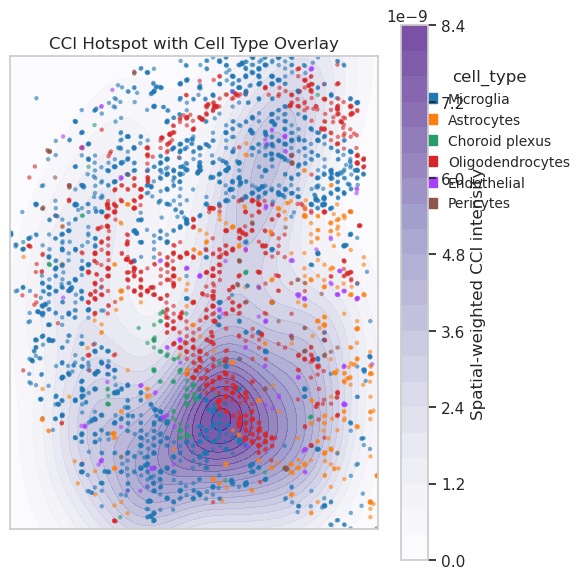

Hotspot region cell type composition (top 10% CCI):
                  proportion  count
cell_type                          
Microglia            0.40125   1605
Oligodendrocytes     0.29850   1194
Astrocytes           0.11650    466
Choroid plexus       0.09200    368
Endothelial          0.07800    312
Pericytes            0.01375     55


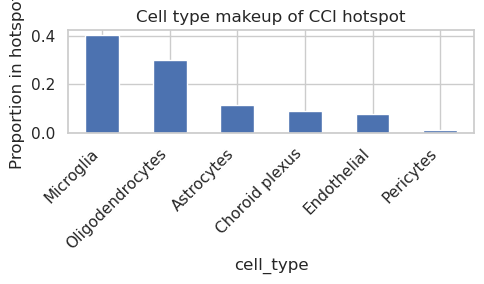

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from collections import Counter
import scanpy as sc
import pandas as pd

# ---- 前提：你已有 ----
# adata_model: 只含 model 组的 AnnData
# coords: adata_model.obsm['spatial']  # shape (n_cells, 2)
# X, Y: meshgrid arrays used to evaluate KDE (shape (n_grid, n_grid))
# grid_coords: np.vstack([X.ravel(), Y.ravel()])  # shape (2, n_grid^2)
# Z_comm: spatial-weighted CCI hotspot values on that grid, shape (n_grid, n_grid)

# 以下从上一步得到的 Z_comm 继续做

# 1. 画等高线 + 细胞类型散点（叠加）
fig, ax = plt.subplots(1, 1, figsize=(6,6))
# hotspot contour
cf = ax.contourf(X, Y, Z_comm, levels=25, cmap="Purples", alpha=0.7)
cbar = fig.colorbar(cf, ax=ax, label="Spatial-weighted CCI intensity")

# 叠加每个细胞，按 cell_type 上色
# 用 scanpy 的调色板拿颜色
cell_types = adata_model.obs['cell_type'].astype(str)
unique_ct = cell_types.unique()
# 生成颜色 mapping（可以用 uns 里的 palette if exists）
palette = sc.pl.palettes.default_20 if len(unique_ct) <= 20 else plt.cm.tab20.colors
color_map = {ct: palette[i % len(palette)] for i, ct in enumerate(unique_ct)}
cell_colors = [color_map[ct] for ct in cell_types]

ax.scatter(coords[:,0], coords[:,1], s=10, c=cell_colors, edgecolors='none', alpha=0.6)

# 图例（用 proxy artists）
from matplotlib.patches import Patch
legend_handles = [Patch(color=color_map[ct], label=ct) for ct in unique_ct]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='cell_type', fontsize='small', frameon=False)

ax.set_title("CCI Hotspot with Cell Type Overlay")
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig("/slurm/home/yrd/fanlab/gaomeng/NRI/spatial/figures/CCI_spatial_hotpot.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 2. 统计 top hotspot 区域里最接近的细胞类型组成
# 设定 threshold（例如 top 10%）
threshold = np.percentile(Z_comm, 90)  # 90th percentile
# 找出 grid 上属于 hotspot 的点索引
hot_idx_flat = np.where(Z_comm.ravel() >= threshold)[0]
# 对应这些 grid 点的空间坐标
hot_grid_points = grid_coords[:, hot_idx_flat].T  # shape (M,2)

# 用 KDTree 找这些 grid 点最近的实际细胞（映射到 cell granularity）
tree = cKDTree(coords)
_, nearest_cell_idx = tree.query(hot_grid_points, k=1)  # 最近的一个 cell per hotspot grid point
hot_cell_types = adata_model.obs['cell_type'].iloc[nearest_cell_idx].astype(str)

# 统计组成
composition = hot_cell_types.value_counts(normalize=True)  # 比例
count = hot_cell_types.value_counts()

print("Hotspot region cell type composition (top 10% CCI):")
print(pd.DataFrame({
    "proportion": composition,
    "count": count
}))

# 可视化组成条形
fig2, ax2 = plt.subplots(1,1, figsize=(5,3))
composition.sort_values(ascending=False).plot.bar(ax=ax2)
ax2.set_ylabel("Proportion in hotspot")
ax2.set_title("Cell type makeup of CCI hotspot")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
